# IMT 573 - Final Examination - Steve Gonzales

Name: IMT 573 Teaching Team
Last Updated: Mar 2025

### Instructions

This is a take-home final examination. You may use your computer, books/articles, notes, course materials, etc., but all work must be your own! Please review the course policy on AI-based learning tools. **References must be appropriately cited and you must make modifications on the code solutions found online, such as ChatGPT. Recycling online codes or other students' work is counted as plagiarism**. Please justify your answers and show all work; a complete argument must be presented to obtain full credit. Before beginning this exam, please ensure you have access to data programming environments used in the course; this can be on your own personal computer or on shared infrastructure hosted by the university. 

1. Download the exam template notebook file from Canvas. Open exam notebook and supply your solutions to the exam by editing the notebook. 

2. Be sure the exam contains your full name. 

3. Be sure to include well-documented (e.g. commented) code chucks, figures, and clearly written text chunk explanations as necessary. Any figures should be clearly labeled and appropriately referenced within the text. Be sure that each visualization adds value to your written explanation; avoid redundancy -- you do not need four different visualizations of the same pattern.

4.  **Collaboration is not allowed on this exam. You may only speak with the course instructor about this material.**

5. All materials and resources that you use (with the exception of lecture slides) must be appropriately referenced within your assignment.

6. Remember partial credit will be awarded for each question for which a serious attempt at finding an answer has been shown. Students are **strongly** encouraged to attempt each question and to document their reasoning process even if they cannot find the correct answer. If you would like to include code to show this process, but it does not run without errors, you can do so by commenting out that code. 

7. When you have completed the assignment and have **checked** that your code both runs in the Console and compiles correctly rename the file to `YourLastName_YourFirstName.ipynb`, and submit BOTH your HTML and notebook files on Canvas.

### Statement of Compliance

You **must** include the a "signed" Statement of Compliance in your submission. The Compliance Statement is found below. You must include this text, word-for-word, in your final exam submission. Adding your name indicates you have read the statement and agree to its terms. Failure to do so will result in your exam **not** being accepted.

**Statement of Compliance**

I affirm that I have had no conversation regarding this exam with any persons other than the instructor. Further, I certify that the attached work represents my own thinking. Any information, concepts, or words that originate from other sources are cited in accordance with University of Washington guidelines as published in the Academic Code (available on the course website). I am aware of the serious consequences that result from improper discussions with others or from the improper citation of work that is not my own. 

Steve Gonzales  Mar 12, 2025

For this assignment, you'll need (at least) the following packages. If the package does not load, be sure it is properly installed.

In [3]:
import os
import math
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

### Problem 1

Points: 20

In this problem we will use data on infidelity, known as the Fair's Affairs dataset. The `Affairs` dataset is available as part of the `datasets` package in`statsmodels`. The original data come from two survey conducted by Psychology Today in 1969 and Redbook in 1974, see Greene (2003) and Fair (1978) for more information. We will use the Redbook data here.

The dataset contains various self-reported characteristics of 6,366 participants, including how often the respondent engaged in extramarital sexual intercourse during the past year, as well as their age, year married, whether they had children, their religiousness (on a 5-point scale, from 1=anti to 5=very), education, occupation (Hillingshead 7-point classification with reverse numbering), and a numeric self-rating of their marriage (from 1=very unhappy to 5=very happy).

<font color = red>SOLUTION: 

In [6]:
data = sm.datasets.fair.load_pandas()
print(sm.datasets.fair.SOURCE)
print(sm.datasets.fair.NOTE)
affairs = data.data
affairs.head
# affairs.describe()


Fair, Ray. 1978. "A Theory of Extramarital Affairs," `Journal of Political
Economy`, February, 45-61.

The data is available at http://fairmodel.econ.yale.edu/rayfair/pdf/2011b.htm

::

    Number of observations: 6366
    Number of variables: 9
    Variable name definitions:

        rate_marriage   : How rate marriage, 1 = very poor, 2 = poor, 3 = fair,
                        4 = good, 5 = very good
        age             : Age
        yrs_married     : No. years married. Interval approximations. See
                        original paper for detailed explanation.
        children        : No. children
        religious       : How relgious, 1 = not, 2 = mildly, 3 = fairly,
                        4 = strongly
        educ            : Level of education, 9 = grade school, 12 = high
                        school, 14 = some college, 16 = college graduate,
                        17 = some graduate school, 20 = advanced degree
        occupation      : 1 = student, 2 = farming, agr

<bound method NDFrame.head of       rate_marriage   age  yrs_married  children  religious  educ  occupation  \
0               3.0  32.0          9.0       3.0        3.0  17.0         2.0   
1               3.0  27.0         13.0       3.0        1.0  14.0         3.0   
2               4.0  22.0          2.5       0.0        1.0  16.0         3.0   
3               4.0  37.0         16.5       4.0        3.0  16.0         5.0   
4               5.0  27.0          9.0       1.0        1.0  14.0         3.0   
...             ...   ...          ...       ...        ...   ...         ...   
6361            5.0  32.0         13.0       2.0        3.0  17.0         4.0   
6362            4.0  32.0         13.0       1.0        1.0  16.0         5.0   
6363            5.0  22.0          2.5       0.0        2.0  14.0         3.0   
6364            5.0  32.0          6.0       1.0        3.0  14.0         3.0   
6365            4.0  22.0          2.5       0.0        2.0  16.0         2.0  

In [ ]:
# Map the categorical data to dummy columns
maps = {
    'rate_marriage': {
    1: 'very poor',
    2: 'poor',
    3: 'fair',
    4: 'good',
    5: 'very good'
 },'religious': {
        1: 'not',
        2: 'mildly',
        3: 'fairly',
        4: 'strongly'
    },
    'educ': {
        9: 'grade school',
        12: 'high school',
        14: 'some college',
        16: 'college graduate',
        17: 'some graduate school',
        20: 'advanced degree'
    },
    'occupation': {
        1: 'student',
        2: 'farming, ag',
        3: 'white-collar',
        4: 'teacher, counselor',
        5: 'managerial, administrative, business', # Keep
        6: 'professional' # Keep
    },
    'occupation_husb': {
        1: 'student',
        2: 'farming, ag',
        3: 'white-collar',
        4: 'teacher, counselor',
        5: 'managerial, administrative, business',
        6: 'professional'
    }
 }
df_affairs = affairs.copy()
for col_name in maps.keys():
    new_map = {k: process_string(v) for k, v in maps[col_name].items()}
    df_affairs[col_name] = df_affairs[col_name].map(new_map)
df_affairs = create_dummies(df_affairs, ['educ', 'occupation', 'occupation_husb'])
df_affairs

(a) Describe the participants. Use descriptive, summarization, and exploratory techniques (visualizations) to describe the participants in the study. Please answer questions :  What is the average age of respondents? What is the proportion of families who do not have any children ? 

In [7]:
#Basic descriptive analysis of data
affairs_df = affairs
df_affairs = affairs_df.copy()

columns = df_affairs.columns
unique_values = {col: df_affairs[col].unique() for col in columns}
for col, values in unique_values.items():
    print(f"Unique values for {col}: {values}")

Unique values for rate_marriage: [3. 4. 5. 2. 1.]
Unique values for age: [32.  27.  22.  37.  42.  17.5]
Unique values for yrs_married: [ 9.  13.   2.5 16.5 23.   6.   0.5]
Unique values for children: [3.  0.  4.  1.  5.5 2. ]
Unique values for religious: [3. 1. 2. 4.]
Unique values for educ: [17. 14. 16. 12. 20.  9.]
Unique values for occupation: [2. 3. 5. 4. 1. 6.]
Unique values for occupation_husb: [5. 4. 3. 2. 6. 1.]
Unique values for affairs: [1.11111100e-01 3.23076920e+00 1.39999960e+00 7.27272700e-01
 4.66666600e+00 8.52173500e-01 1.82608600e+00 4.79999920e+00
 1.33333300e+00 3.26666450e+00 2.04166600e+00 4.84848400e-01
 2.00000000e+00 1.36111070e+00 7.83999630e+00 2.54545400e+00
 5.32608700e-01 6.22222200e-01 5.83333300e-01 1.66666600e-01
 6.15384600e-01 1.18787770e+00 1.11999989e+01 2.17777630e+00
 7.00000000e+00 5.21739100e-01 2.12121200e-01 4.00000000e-01
 3.19999980e+00 1.50769140e+00 4.89999960e+00 4.34783000e-02
 7.69231000e-02 2.92173860e+00 2.68799896e+01 6.06061000e-02

In [8]:
# Answer to Question a
# Descriptive information about the Dataset
print("Answer to Question 1a Descriptive information about the Dataset")
display(df_affairs.isna().sum())
print("Shape: ", df_affairs.shape)
df_affairs.describe()

Answer to Question 1a Descriptive information about the Dataset


rate_marriage      0
age                0
yrs_married        0
children           0
religious          0
educ               0
occupation         0
occupation_husb    0
affairs            0
dtype: int64

Shape:  (6366, 9)


,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
count,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000
mean,4.109645,29.082862,9.009425,1.396874,2.426170,14.209865,3.424128,3.850141,0.705374
std,0.961430,6.847882,7.280120,1.433471,0.878369,2.178003,0.942399,1.346435,2.203374
min,1.000000,17.500000,0.500000,0.000000,1.000000,9.000000,1.000000,1.000000,0.000000
25%,4.000000,22.000000,2.500000,0.000000,2.000000,12.000000,3.000000,3.000000,0.000000
50%,4.000000,27.000000,6.000000,1.000000,2.000000,14.000000,3.000000,4.000000,0.000000
75%,5.000000,32.000000,16.500000,2.000000,3.000000,16.000000,4.000000,5.000000,0.484848
max,5.000000,42.000000,23.000000,5.500000,4.000000,20.000000,6.000000,6.000000,57.599991


<b>Answer:</b><p>
The data seems to look good: all categories are adhered to and there are no NaN values

In [9]:
# Answer to Question a
# Summary information about the Dataset
print("Answer to Question 1a Summary information about the Dataset")
n_total_respondents = len(df_affairs)
print(f"There are a total of {n_total_respondents:,} respondents")
print(f"The average age of respondents: {df_affairs['age'].mean():.2f}")
n_have_no_child = len(df_affairs[(df_affairs['children'] == 0)])
n_have_child = len(df_affairs[(df_affairs['children'] != 0)])
print(f"Proportion of families who do not have any children: {n_have_no_child/n_total_respondents:.2%}")

Answer to Question 1a Summary information about the Dataset
There are a total of 6,366 respondents
The average age of respondents: 29.08
Proportion of families who do not have any children: 37.92%


Answer to Question 1a Exploratory information about the Dataset


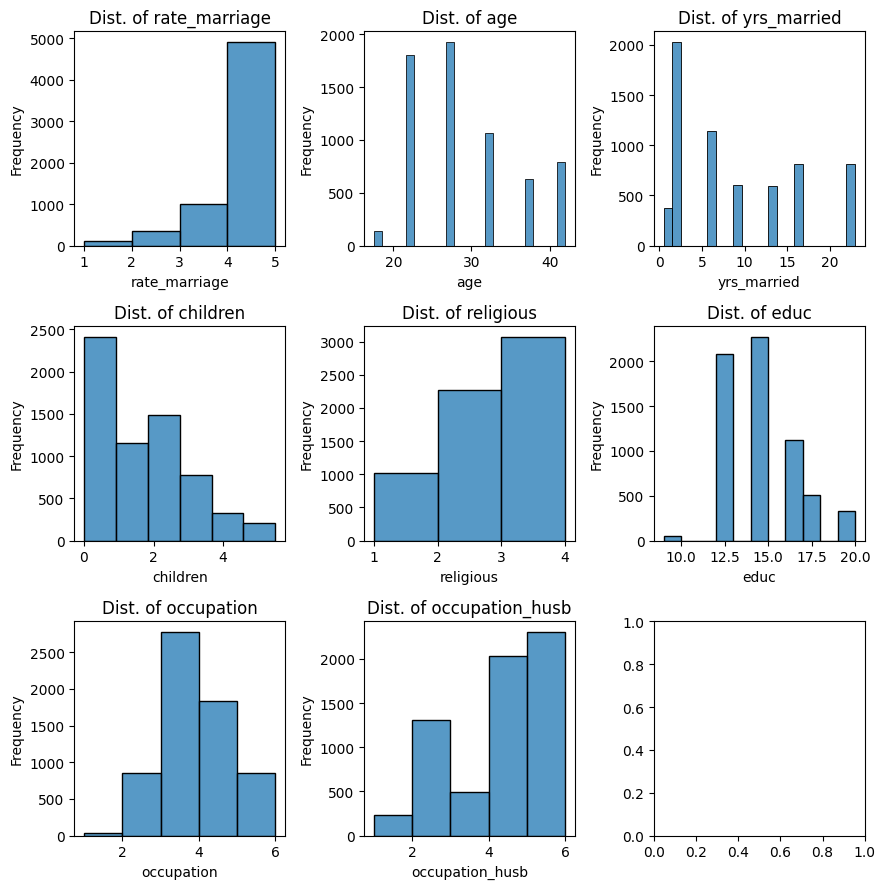

In [10]:
# Answer to Question a
# Summary information about the Dataset
print("Answer to Question 1a Exploratory information about the Dataset")
# Basic Distribution of Variables

fig, axes = plt.subplots(3, 3, figsize=(9, 9))
# Flatten the axes array for easy iteration
axes = axes.flatten()

for i, col in enumerate(columns):
    if col != 'affairs':
        # Plot histograms for each column
        sns.histplot(df_affairs[col], ax=axes[i], binwidth=1)
        axes[i].set_title(f'Dist. of {col}')
        axes[i].set_xlabel(col)
        axes[i].set_ylabel('Frequency')

# Remove any empty subplots
for j in range(len(columns), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

(b) Suppose we want to explore the characteristics of participants who engage in extramarital sexual intercourse (i.e. affairs). Instead of modeling the number of affairs, consider the binary outcome - had an affair versus didn't have an affair. Create a new variable to capture this response variable of interest. What might the advantages and disadvantages of this approach to modeling the data be in this context?

In [11]:
# Create a new variable where the length of the affair is greater than 0
df_affairs['had_affair'] = (df_affairs['affairs'] > 0).astype(int)
display(df_affairs)

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs,had_affair
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111,1
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769,1
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000,1
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273,1
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,4.666666,1
...,...,...,...,...,...,...,...,...,...,...
6361,5.0,32.0,13.0,2.0,3.0,17.0,4.0,3.0,0.000000,0
6362,4.0,32.0,13.0,1.0,1.0,16.0,5.0,5.0,0.000000,0
6363,5.0,22.0,2.5,0.0,2.0,14.0,3.0,1.0,0.000000,0
6364,5.0,32.0,6.0,1.0,3.0,14.0,3.0,4.0,0.000000,0


The advantage to creating `df['had_affair']` is that we can more accurately predict infidelity with this variable. Allows the use of classification algorithms which are well-suited for binary outcomes.<p>
However, the disadvantage is that if we wanted to predict the extent of infidelity, we obviously could not use this variable. It also removes some data that might be useful for other correlation analysis. In addition, there are many kinds of models that should not be used to predict a binary outcome.

(c) Use an appropriate regression model to explore the relationship between having an affair (binary) and other personal characteristics. 

In [6]:
import pandas as pd
import statsmodels.formula.api as smf
import numpy as np

# Improved Sample Data (avoiding perfect separation)
np.random.seed(42)  # For reproducibility

n = 500  # Increased sample size

data = {
    'outcome': np.random.choice([0, 1], size=n),
    'color': np.random.choice(['red', 'blue', 'green'], size=n),
    'size': np.random.normal(loc=15, scale=5, size=n),
    'shape': np.random.choice(['circle', 'square', 'triangle'], size=n)
}

df = pd.DataFrame(data)

# Introduce some correlation (to make it more realistic)
df['outcome'] = (0.4 * (df['size'] > 15) + 0.3 * (df['color'] == 'blue') + np.random.normal(0, 0.2, n) > 0.5).astype(int)

# --- With C() ---
print("\n--- Logit Model with C() ---")
logit_model_with_c = smf.logit('outcome ~ C(color) + size + C(shape)', data=df).fit()
print(logit_model_with_c.summary())

# --- Without C() ---
print("\n--- Logit Model without C() ---")

# Convert color and shape to numerical representations (not dummy variables)
color_mapping = {'red': 1, 'blue': 2, 'green': 3}
shape_mapping = {'circle': 1, 'square': 2, 'triangle': 3}

df['color_numeric'] = df['color'].map(color_mapping)
df['shape_numeric'] = df['shape'].map(shape_mapping)

# Fit the model without C()
logit_model_without_c = smf.logit('outcome ~ color_numeric + size + shape_numeric', data=df).fit()
print(logit_model_without_c.summary())


--- Logit Model with C() ---
Optimization terminated successfully.
         Current function value: 0.411452
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                outcome   No. Observations:                  500
Model:                          Logit   Df Residuals:                      494
Method:                           MLE   Df Model:                            5
Date:                Thu, 13 Mar 2025   Pseudo R-squ.:                  0.2712
Time:                        14:09:24   Log-Likelihood:                -205.73
converged:                       True   LL-Null:                       -282.26
Covariance Type:            nonrobust   LLR p-value:                 2.964e-31
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               -3.5048      0.511     -6.865     

In [12]:
# Try Logit

# Define the predictor variables
predictors = ['rate_marriage', 'age', 'yrs_married', 'children', 'religious', 'educ', 'occupation', 'occupation_husb']

# Add a constant to the predictor variables (intercept)
X = sm.add_constant(df_affairs[predictors])

# Define the response variable
y = df_affairs['had_affair']

# Fit the logistic regression model
logit_model = sm.Logit(y, X)
result = logit_model.fit()

print(result.summary())

Optimization terminated successfully.
         Current function value: 0.545314
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:             had_affair   No. Observations:                 6366
Model:                          Logit   Df Residuals:                     6357
Method:                           MLE   Df Model:                            8
Date:                Wed, 12 Mar 2025   Pseudo R-squ.:                  0.1327
Time:                        18:59:25   Log-Likelihood:                -3471.5
converged:                       True   LL-Null:                       -4002.5
Covariance Type:            nonrobust   LLR p-value:                5.807e-224
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               3.7257      0.299     12.470      0.000       3.140       4.311
rate_marriage 

In [ ]:
def get_logit_model(X, y):
    # Add a constant to the predictor variables (intercept)
    X = sm.add_constant(X)

    # Fit the logistic regression model
    logit_model = sm.Logit(y, X)
    logit_model_fit = logit_model.fit()

    return logit_model_fit.summary(), logit_model_fit

In [13]:
# Try Logit, Probit Models
all_sms = {}
model = sm.Logit(y, X)
all_sms['logit'] = model.fit()
model = sm.Probit(y, X)
all_sms['probit'] = model.fit()
for model_code in all_sms.keys():
    print(model_code, all_sms[model_code].summary())
    print('')

Optimization terminated successfully.
         Current function value: 0.545314
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.545017
         Iterations 5
logit                            Logit Regression Results                           
Dep. Variable:             had_affair   No. Observations:                 6366
Model:                          Logit   Df Residuals:                     6357
Method:                           MLE   Df Model:                            8
Date:                Wed, 12 Mar 2025   Pseudo R-squ.:                  0.1327
Time:                        18:59:25   Log-Likelihood:                -3471.5
converged:                       True   LL-Null:                       -4002.5
Covariance Type:            nonrobust   LLR p-value:                5.807e-224
                      coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------

(d) Interpret question (c)'s model results.

<b>Answer:</b><p>
<b>Picking `Logistic Regression` model or should I pick Probit??</b><p>
Most of the variables are statistically significant (except having `children` and the occupation of the husband `occupation_husb`), meaning that there is a very small probability that the observed results occurred by random chance alone, assuming the null hypothesis is true.<p>
    
There is a very strong negative correlation between the 'quality' of the marriage and infidelity, ie when the quality of the marriage is high (`5 = very good`) there is a very low likelihood of infidelity. Conversly, if the quality of the marriage is low `0` then there is a much higher probability of infidelity. The coefficient for `rate_marriage` (-0.7161) indicates that for each one-unit increase in marital quality, the odds of infidelity decrease by 0.7161. In practical terms, this translates to a substantial reduction in the probability of infidelity.<p>
    
On the other end of the spectrum, the number of years a couple was married has a positive correlation to infidelity, but at a much lower rate of `.11`

(e) Create an artificial test dataset where marital rating varies from 1 to 5 and all other variables are set to their means. Use it as a test dataset to obtain predicted "affair" based on question (c)'s best model for cases in the test data. Interpret your results and use a visualization to support your interpretation.

Remember: if you notice any variables which do not make statistically significant impacts on the response variable based on the part (c) model summary, then remove them to retrieve the best model

In [14]:
# Create a new DF with average values for all vars except the affairs columns

# Pull out non statistically significant cols
prob_e_columns = ['rate_marriage', 'age', 'yrs_married', 'religious', 'educ',
       'occupation', 'affairs', 'had_affair']
# Create a single DF with one row per column of means
df_means = df_affairs.mean()
display(df_means)

# Create a new DF
df_affairs_test = df_affairs.copy()
# Put random values for rate_marriage
rng = np.random.default_rng(7)
random_values = rng.integers(low=1, high=6, size=len(df_affairs_test))  # high is exclusive, so use 6
df_affairs_test['rate_marriage'] = random_values
for col in prob_e_columns:
    if col not in ['rate_marriage', 'affairs', 'had_affair']:
        df_affairs_test[col] = df_means[col]
display(df_affairs_test)

rate_marriage       4.109645
age                29.082862
yrs_married         9.009425
children            1.396874
religious           2.426170
educ               14.209865
occupation          3.424128
occupation_husb     3.850141
affairs             0.705374
had_affair          0.322495
dtype: float64

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs,had_affair
0,5,29.082862,9.009425,3.0,2.42617,14.209865,3.424128,5.0,0.111111,1
1,4,29.082862,9.009425,3.0,2.42617,14.209865,3.424128,4.0,3.230769,1
2,4,29.082862,9.009425,0.0,2.42617,14.209865,3.424128,5.0,1.400000,1
3,5,29.082862,9.009425,4.0,2.42617,14.209865,3.424128,5.0,0.727273,1
4,3,29.082862,9.009425,1.0,2.42617,14.209865,3.424128,4.0,4.666666,1
...,...,...,...,...,...,...,...,...,...,...
6361,3,29.082862,9.009425,2.0,2.42617,14.209865,3.424128,3.0,0.000000,0
6362,5,29.082862,9.009425,1.0,2.42617,14.209865,3.424128,5.0,0.000000,0
6363,4,29.082862,9.009425,0.0,2.42617,14.209865,3.424128,1.0,0.000000,0
6364,1,29.082862,9.009425,1.0,2.42617,14.209865,3.424128,4.0,0.000000,0


In [15]:
# Try all the variables with Logit and Probit
test_predictors = ['rate_marriage', 'age', 'yrs_married', 'religious', 'educ', 'occupation']
# Add a constant to the predictor variables (intercept)
X = sm.add_constant(df_affairs_test[test_predictors])

# Define the response variable
y = df_affairs_test['had_affair']
test_model = sm.Logit(y, X)
test_result = test_model.fit(maxiter=1000)
print(test_result.summary())
test_model = sm.Probit(y, X)
test_result = test_model.fit(maxiter=1000)
print(test_result.summary())

         Current function value: 0.628673
         Iterations: 1000
                           Logit Regression Results                           
Dep. Variable:             had_affair   No. Observations:                 6366
Model:                          Logit   Df Residuals:                     6362
Method:                           MLE   Df Model:                            3
Date:                Wed, 12 Mar 2025   Pseudo R-squ.:               9.861e-05
Time:                        18:59:25   Log-Likelihood:                -4002.1
converged:                      False   LL-Null:                       -4002.5
Covariance Type:            nonrobust   LLR p-value:                    0.8520
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
rate_marriage     0.0169      0.019      0.888      0.374      -0.020       0.054
age              -0.2664   5.28e+04  -5.04e-06      1.

S:\code\uw\IMT573\py38_venv\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.628674
         Iterations: 1000
                          Probit Regression Results                           
Dep. Variable:             had_affair   No. Observations:                 6366
Model:                         Probit   Df Residuals:                     6362
Method:                           MLE   Df Model:                            3
Date:                Wed, 12 Mar 2025   Pseudo R-squ.:               9.850e-05
Time:                        18:59:26   Log-Likelihood:                -4002.1
converged:                      False   LL-Null:                       -4002.5
Covariance Type:            nonrobust   LLR p-value:                    0.8522
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
rate_marriage     0.0103      0.012      0.888      0.375      -0.012       0.033
age              -0.0264   1.78e+04  -1.49e-06      1.

S:\code\uw\IMT573\py38_venv\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [16]:
# Try just the continuous variables
test_predictors = ['age', 'yrs_married']
# Add a constant to the predictor variables (intercept)
X = sm.add_constant(df_affairs_test[test_predictors])

# Define the response variable
y = df_affairs_test['had_affair']
test_model = sm.Logit(y, X)
test_result = test_model.fit(maxiter=1000)
print(test_result.summary())
test_model = sm.Probit(y, X)
test_result = test_model.fit(maxiter=1000)
print(test_result.summary())

         Current function value: 0.628735
         Iterations: 1000
                           Logit Regression Results                           
Dep. Variable:             had_affair   No. Observations:                 6366
Model:                          Logit   Df Residuals:                     6364
Method:                           MLE   Df Model:                            1
Date:                Wed, 12 Mar 2025   Pseudo R-squ.:               6.325e-11
Time:                        18:59:27   Log-Likelihood:                -4002.5
converged:                      False   LL-Null:                       -4002.5
Covariance Type:            nonrobust   LLR p-value:                    0.9994
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
age            -0.1507        nan        nan        nan         nan         nan
yrs_married     0.4039        nan        nan        nan     

S:\code\uw\IMT573\py38_venv\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.628735
         Iterations: 1000
                          Probit Regression Results                           
Dep. Variable:             had_affair   No. Observations:                 6366
Model:                         Probit   Df Residuals:                     6364
Method:                           MLE   Df Model:                            1
Date:                Wed, 12 Mar 2025   Pseudo R-squ.:               1.106e-10
Time:                        18:59:28   Log-Likelihood:                -4002.5
converged:                      False   LL-Null:                       -4002.5
Covariance Type:            nonrobust   LLR p-value:                    0.9992
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
age             0.0342   1.74e+04   1.97e-06      1.000   -3.41e+04    3.41e+04
yrs_married    -0.1617   5.62e+04  -2.88e-06      1.000    -

S:\code\uw\IMT573\py38_venv\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


(f) Use a stepwise selection procedure (forward selection or backward elimination) to obtain a "best" regression model between this response variable - affairs(measure of time spent in extramarital affairs) and other characteristics. Is the "best" model different from the best model you got from question (c)? Which variables are included in this question's "best" fit model?

<b>Answer:</b><p>
When using stepwise selection, we can reject any variable whose p-value is above .05. Also, when adding a variable in, if it increases the Adjusted R-squared value, we know it is improving the regression fit.

In [ ]:
# Logistic Regression; Do NOT think we can use this because of Continuous predictions

# Go back to the regular dataset
# This will figure out what combination of predictors are best
predictors = ['rate_marriage', 'age', 'yrs_married', 'religious', 'educ', 'occupation']
y = affairs['affairs']
prev_adj_r = -999.99
for i in range(1, len(predictors)):
    print(f"Trying {predictors[:i]}")

    X = sm.add_constant(affairs[predictors[:i]])
    # Define the response variable
    y = affairs['had_affair']
    # Fit the logistic regression model
    logit_model = sm.Logit(y, X)
    result = logit_model.fit()

    # print(result.summary())
    p_values = result.pvalues
    adj_r_squared = result.prsquared
    print(adj_r_squared)
    if adj_r_squared > prev_adj_r:
        print("***better adjusted r squared")
    prev_adj_r = adj_r_squared
    good_p_values = p_values[p_values <= .05]
    print(good_p_values)
    print('='*50)

In [17]:
# Is it ok to go back the the non-mean data set?
# This will figure out what combination of predictors are best
test_predictors = ['rate_marriage', 'age', 'yrs_married', 'religious', 'educ', 'occupation']
y = df_affairs['affairs']
prev_adj_r = -999.99
for i in range(1, len(test_predictors)):
    print(f"Trying {test_predictors[:i]}")
    X = sm.add_constant(df_affairs[test_predictors[:i]])
    test_model = sm.OLS(y, X)
    test_result = test_model.fit(maxiter=1000)
    # print(test_result.summary())
    p_values = test_result.pvalues
    adj_r_squared = test_result.rsquared_adj
    print(adj_r_squared)
    if adj_r_squared > prev_adj_r:
        print("***better adjusted r squared")
        prev_adj_r = adj_r_squared
    good_p_values = p_values[p_values <= .05]
    print(good_p_values)

Trying ['rate_marriage']
0.031556118109925424
***better adjusted r squared
const            4.281391e-86
rate_marriage    1.656585e-46
dtype: float64
Trying ['rate_marriage', 'age']
0.04360393729085832
***better adjusted r squared
const            1.940749e-88
rate_marriage    8.181093e-53
age              2.696877e-19
dtype: float64
Trying ['rate_marriage', 'age', 'yrs_married']
0.04429268861554769
***better adjusted r squared
const            4.780359e-44
rate_marriage    1.189042e-53
yrs_married      1.813827e-02
dtype: float64
Trying ['rate_marriage', 'age', 'yrs_married', 'religious']
0.05341519287491858
***better adjusted r squared
const            3.458985e-53
rate_marriage    9.518187e-49
yrs_married      3.286821e-02
religious        3.427103e-15
dtype: float64
Trying ['rate_marriage', 'age', 'yrs_married', 'religious', 'educ']
0.05329495928847361
const            2.812273e-43
rate_marriage    2.207941e-48
yrs_married      3.019159e-02
religious        3.955364e-15
dtype: floa

<b>Answer:</b><p>
We can't use the same model in Problem 1e as in 1f because 1e is predicting a binary outcome, in which we can use Logistic Regression, but Problem 1f is predicting a continous variable, which we need to use Ordinary Least Squares.<p>
As you can see from above, with each addition of a new variable, the adjusted R Squared increases, so we will want to use the last one with all the variables: `['rate_marriage', 'age', 'yrs_married', 'religious', 'educ']`<p>
Age and Religion are also statistically significant, so we will keep those.

(g) Reflect on your analysis in this problem. After completing all the parts of this analysis what remaining and additional ethical and privacy conerns do you have?

<b>Answer:</b><p>
TBD: Eithical and Privacy

### Problem 2

Points: 20

In this problem set, we will use some data from a sports context. The data is provided as part of the [Introduction to Statistial Learning with Applications in Python](https://www.statlearning.com/) textbook. It was taken from the StatLib library which is maintained at Carnegie Mellon University. The data provided is part of the data that was used in the 1988 ASA Graphics Section Poster Session. The salary data were originally from Sports Illustrated, April 20, 1987. The 1986 and career statistics were obtained from The 1987 Baseball Encyclopedia Update published by Collier Books, Macmillan Publishing Company, New York.

Following the directions below to load this data, `Hitters` directly from the `ISLP` python package. You may need to install the `ISLP` package before you can get started. In the Jupyter Hub you can open a terminal and use `pip install ISLP`. Next load the data as follows:

In [18]:
try:
    from ISLP import load_data
    Hitters = load_data('Hitters')
except:
    print("This package is old and cannot be installed on Windows, data copied from Github instead")
    Hitters = pd.read_csv('Hitters.csv')
    
Hitters.head()

This package is old and cannot be installed on Windows, data copied from Github instead


,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
0,293,66,1,30,29,14,1,293,66,1,30,29,14,A,E,446,33,20,NaN,A
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N


<b>Note:</b><p>
Cannot install ISLP; I tried for hours. There is an issue with versions and Cargo and Rust, which are massive platforms. The CSV files are quite small and readily available on Github.
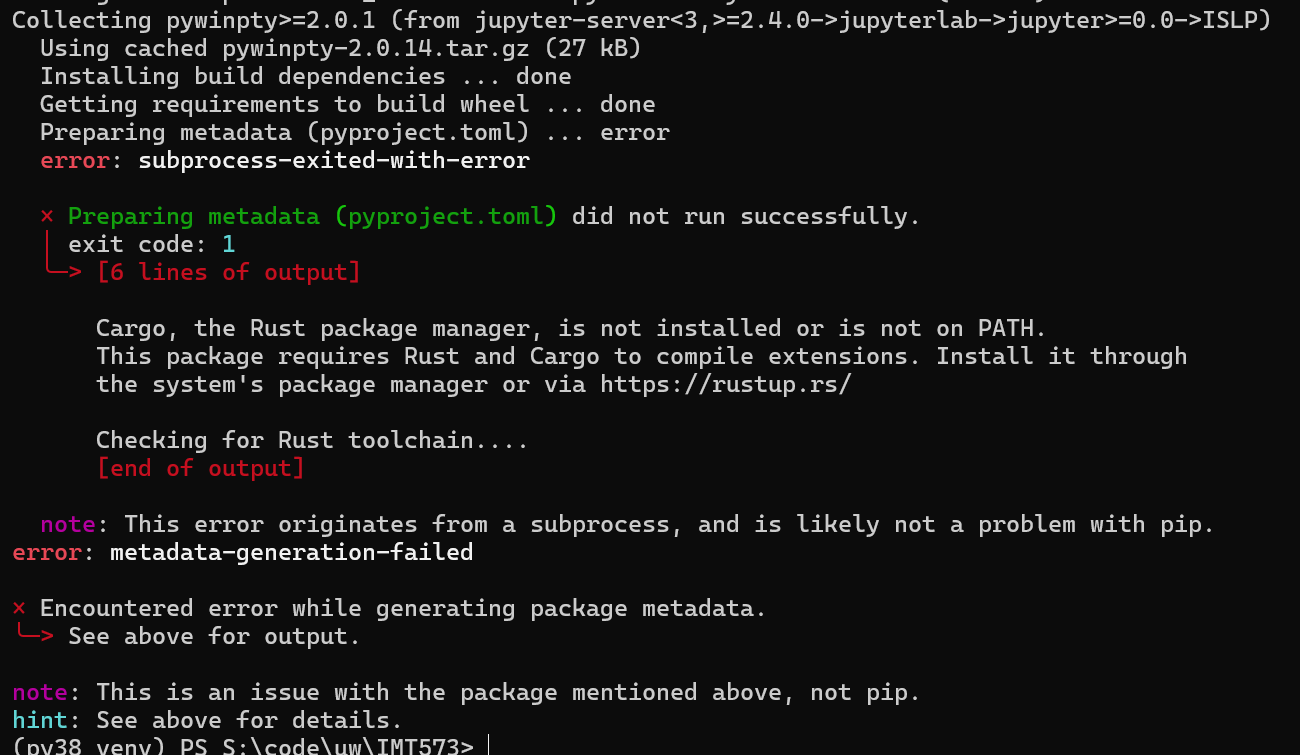

<b>Answer:</b><p>
Major League Baseball Data from the 1986 and 1987 seasons.
- `AtBat`: Number of times at bat in 1986
- `Hits`: Number of hits in 1986
- `HmRun`: Number of home runs in 1986
- `Runs`: Number of runs in 1986
- `RBI`: Number of runs batted in in 1986
- `Walks`: Number of walks in 1986
- `Years`: Number of years in the major leagues
- `CAtBat`: Number of times at bat during his career
- `CHits`: Number of hits during his career
- `CHmRun`: Number of home runs during his career
- `CRuns`: Number of runs during his career
- `CRBI`: Number of runs batted in during his career
- `CWalks`: Number of walks during his career
- `League`: A factor with levels A and N indicating player’s league at the end of 1986
- `Division`: A factor with levels E and W indicating player’s division at the end of 1986
- `PutOuts`: Number of put outs in 1986
- `Assists`: Number of assists in 1986
- `Errors`: Number of errors in 1986
- `Salary`: 1987 annual salary on opening day in thousands of dollars
- `NewLeague`: A factor with levels A and N indicating player’s league at the beginning of 1987<p>
The salary data were originally from Sports Illustrated, April 20, 1987.

(a) Develop your own question to address in this analysis. Your question should be specific and measurable, and it should be able to be addressed through a basic analysis of the `Hitters` dataset. Hint: you will need to get to know this dataset and the variables available to formulate an appropriate question.

In [19]:
# Basic descriptive analysis
df_hit = Hitters.copy()
display(df_hit.isna().sum())
print(df_hit.shape)
df_hit.describe()

AtBat         0
Hits          0
HmRun         0
Runs          0
RBI           0
Walks         0
Years         0
CAtBat        0
CHits         0
CHmRun        0
CRuns         0
CRBI          0
CWalks        0
League        0
Division      0
PutOuts       0
Assists       0
Errors        0
Salary       59
NewLeague     0
dtype: int64

(322, 20)


,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,Salary
count,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000,322.00000,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000,263.000000
mean,380.928571,101.024845,10.770186,50.909938,48.027950,38.742236,7.444099,2648.68323,717.571429,69.490683,358.795031,330.118012,260.239130,288.937888,106.913043,8.040373,535.925882
std,153.404981,46.454741,8.709037,26.024095,26.166895,21.639327,4.926087,2324.20587,654.472627,86.266061,334.105886,333.219617,267.058085,280.704614,136.854876,6.368359,451.118681
min,16.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,19.00000,4.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,67.500000
25%,255.250000,64.000000,4.000000,30.250000,28.000000,22.000000,4.000000,816.75000,209.000000,14.000000,100.250000,88.750000,67.250000,109.250000,7.000000,3.000000,190.000000
50%,379.500000,96.000000,8.000000,48.000000,44.000000,35.000000,6.000000,1928.00000,508.000000,37.500000,247.000000,220.500000,170.500000,212.000000,39.500000,6.000000,425.000000
75%,512.000000,137.000000,16.000000,69.000000,64.750000,53.000000,11.000000,3924.25000,1059.250000,90.000000,526.250000,426.250000,339.250000,325.000000,166.000000,11.000000,750.000000
max,687.000000,238.000000,40.000000,130.000000,121.000000,105.000000,24.000000,14053.00000,4256.000000,548.000000,2165.000000,1659.000000,1566.000000,1378.000000,492.000000,32.000000,2460.000000


<b>Question:</b> Are Home Runs a predictor of overall Runs? Ie Does the player who hits more home runs, also make it to home plate when other players are batting? Or possibly, are they a poor runner and the two variables would be negatively correlated. Will do this for 1986 only (not career). 

(b) Briefly summarize the dataset, describing what data exists and its basic properties. Comment on any issues that need to be resolved before you can proceed with your analysis. 


The data consists of mostly data from the 1986 season, with some information on 1987 and most 1986 statistics are accompanied by career statistics. The data is mostly clean except for Salary information which has about 20% of the data missing: my original question was, "Does Salary predict Runs or Home Runs?", but I don't think it's appropriate with this dataset.<p>
For ease of processing, I will create a new column that subtracts out Home Runs from Runs, which will equal the player's runs attributed to non-Home Runs.

(c) Use the dataset to provide empirical evidence that addressed your question from (a). Discuss your results. Provide **at least two visualizations** to support your story. 

In [20]:
# Prepare the dataframe by creating a new column which has Runs not attributed to Home Runs
df_hit['nonHRRuns'] = df_hit['Runs']-df_hit['HmRun']
# Prepare the dataframe by converting NaN to 0
df_hit.fillna(0, inplace=True)
display(df_hit)

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,...,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague,nonHRRuns
0,293,66,1,30,29,14,1,293,66,1,...,29,14,A,E,446,33,20,0.0,A,29
1,315,81,7,24,38,39,14,3449,835,69,...,414,375,N,W,632,43,10,475.0,N,17
2,479,130,18,66,72,76,3,1624,457,63,...,266,263,A,W,880,82,14,480.0,A,48
3,496,141,20,65,78,37,11,5628,1575,225,...,838,354,N,E,200,11,3,500.0,N,45
4,321,87,10,39,42,30,2,396,101,12,...,46,33,N,E,805,40,4,91.5,N,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
317,497,127,7,65,48,37,5,2703,806,32,...,311,138,N,E,325,9,3,700.0,N,58
318,492,136,5,76,50,94,12,5511,1511,39,...,451,875,A,E,313,381,20,875.0,A,71
319,475,126,3,61,43,52,6,1700,433,7,...,93,146,A,W,37,113,7,385.0,A,58
320,573,144,9,85,60,78,8,3198,857,97,...,420,332,A,E,1314,131,12,960.0,A,76


<b>Answer:</b><p>
Hypothesis is made that Non Home Run Runs (nonHRRuns) are more predictive than Total Runs (Runs). Let's test that hypothesis.

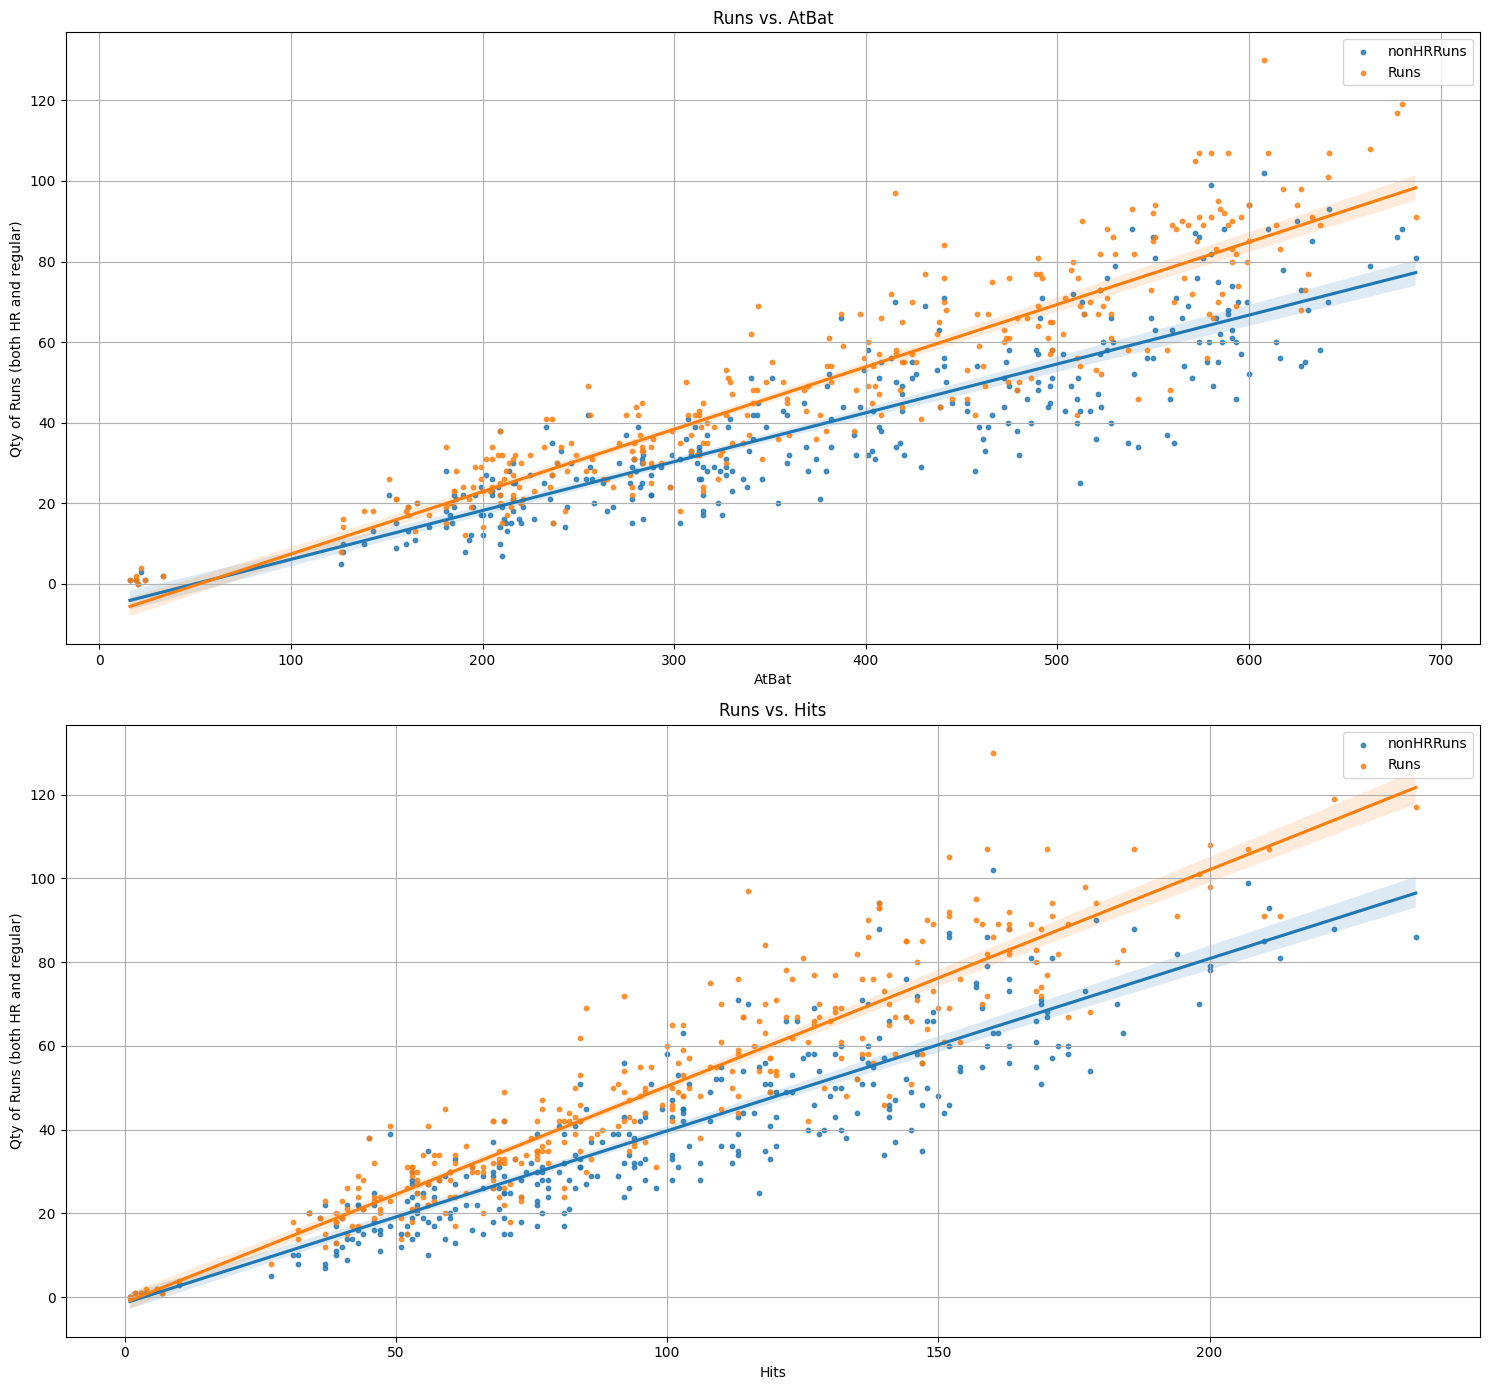

In [55]:
fig, axes = plt.subplots(2, 1, figsize=(15, 14))
axes = axes.flatten()
# Filter out Runs, because it is just a proxy for nonHRRuns, filter out text data
predictors = ['AtBat', 'Hits']
y_vals = ['nonHRRuns', 'Runs']
for i, col in enumerate(predictors):
    for y_val in y_vals:
        # Create a scatter plot with a regression line
        sns.regplot(x=col, y=y_val, data=df_hit, ax=axes[i], scatter_kws={'s': 10}, label=y_val) #scatter_kws to make points smaller.
        axes[i].set_xlabel(col)
        axes[i].set_ylabel(f"Qty of Runs (both HR and regular)")
        axes[i].set_title(f"{y_val} vs. {col}")
        axes[i].grid(True)
    axes[i].legend()
plt.tight_layout()
plt.show()

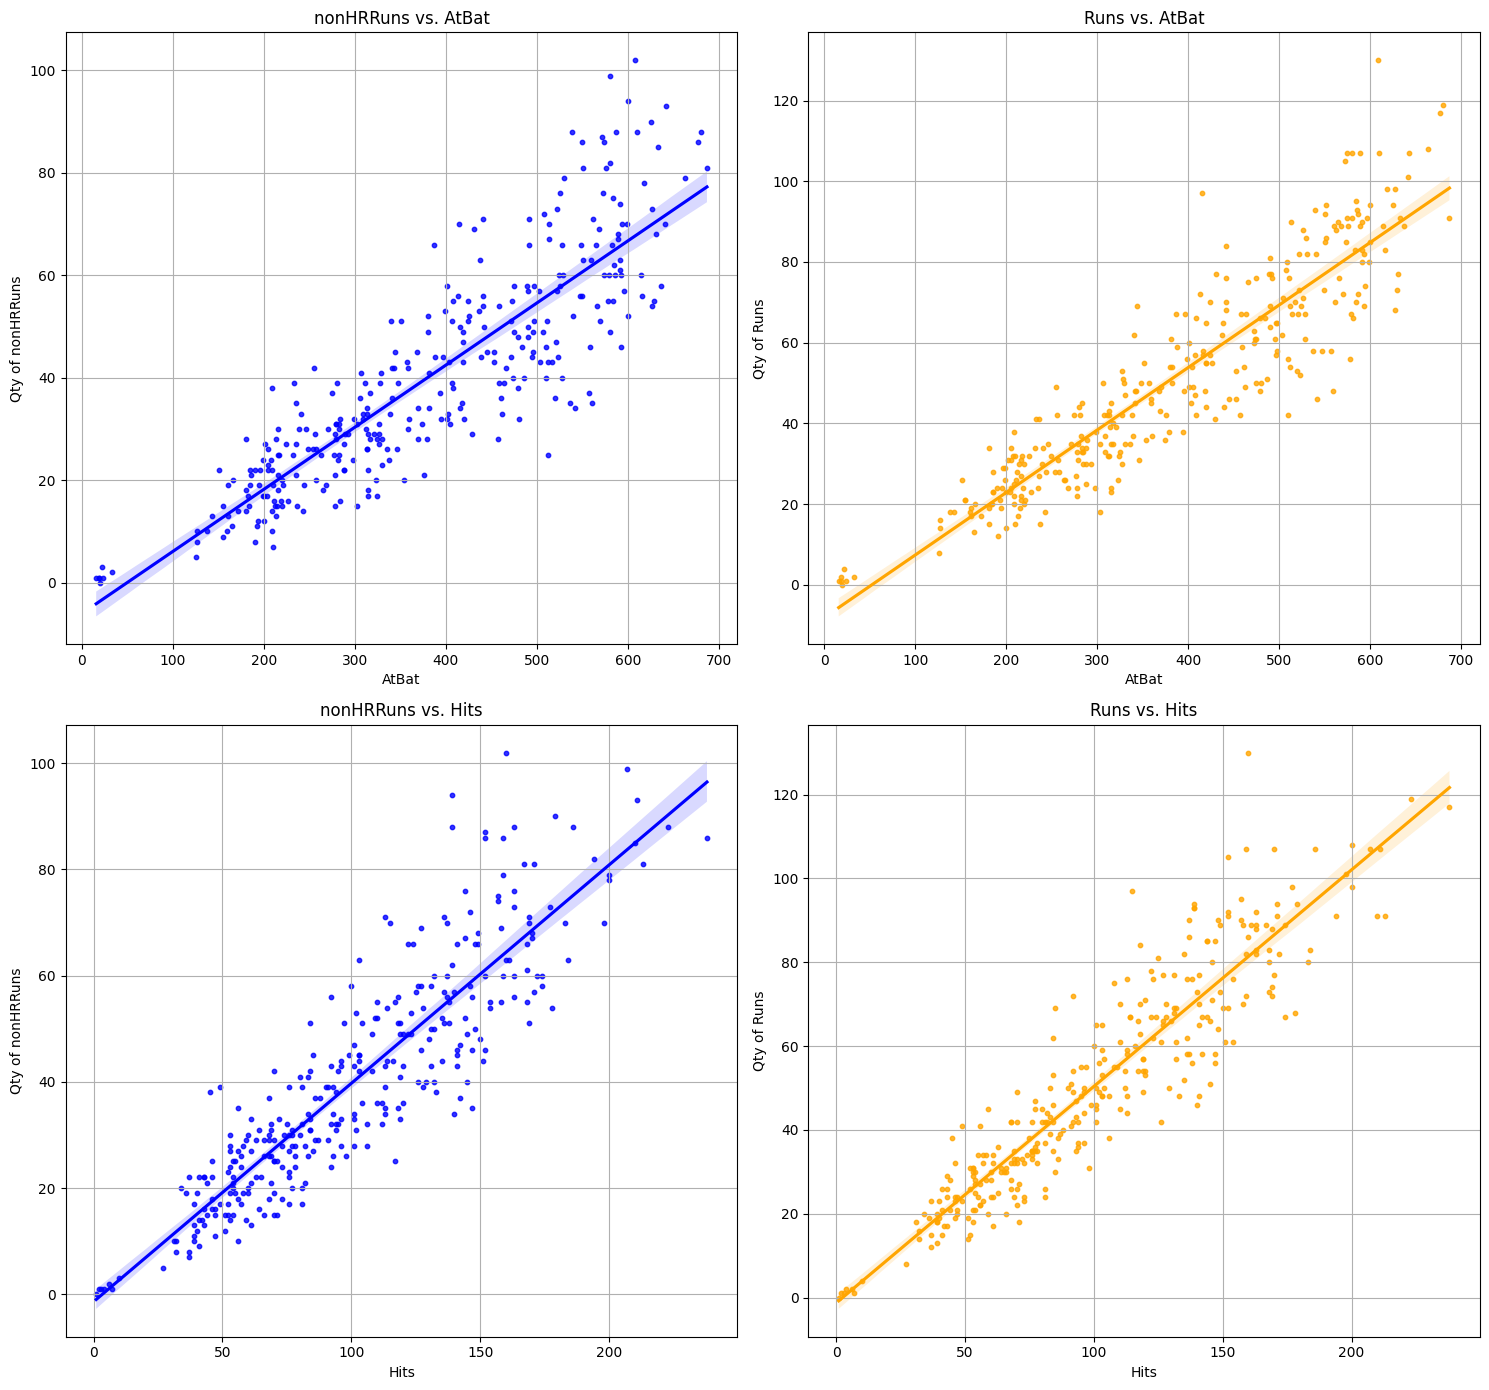

In [56]:
fig, axes = plt.subplots(2, 2, figsize=(15, 14))
axes = axes.flatten()
# Filter out Runs, because it is just a proxy for nonHRRuns, filter out text data
predictors = ['AtBat', 'Hits']
y_vals = ['nonHRRuns', 'Runs']
i = 0
for col in predictors:
    for y_val in y_vals:
        # Create a scatter plot with a regression line
        if y_val == 'nonHRRuns':
            color = 'blue'
        else:
            color = 'orange'
        sns.regplot(x=col, y=y_val, data=df_hit, ax=axes[i], scatter_kws={'s': 10}, color=color) #scatter_kws to make points smaller.
        axes[i].set_xlabel(col)
        axes[i].set_ylabel(f"Qty of {y_val}")
        axes[i].set_title(f"{y_val} vs. {col}")
        axes[i].grid(True)
        i += 1
plt.tight_layout()
plt.show()

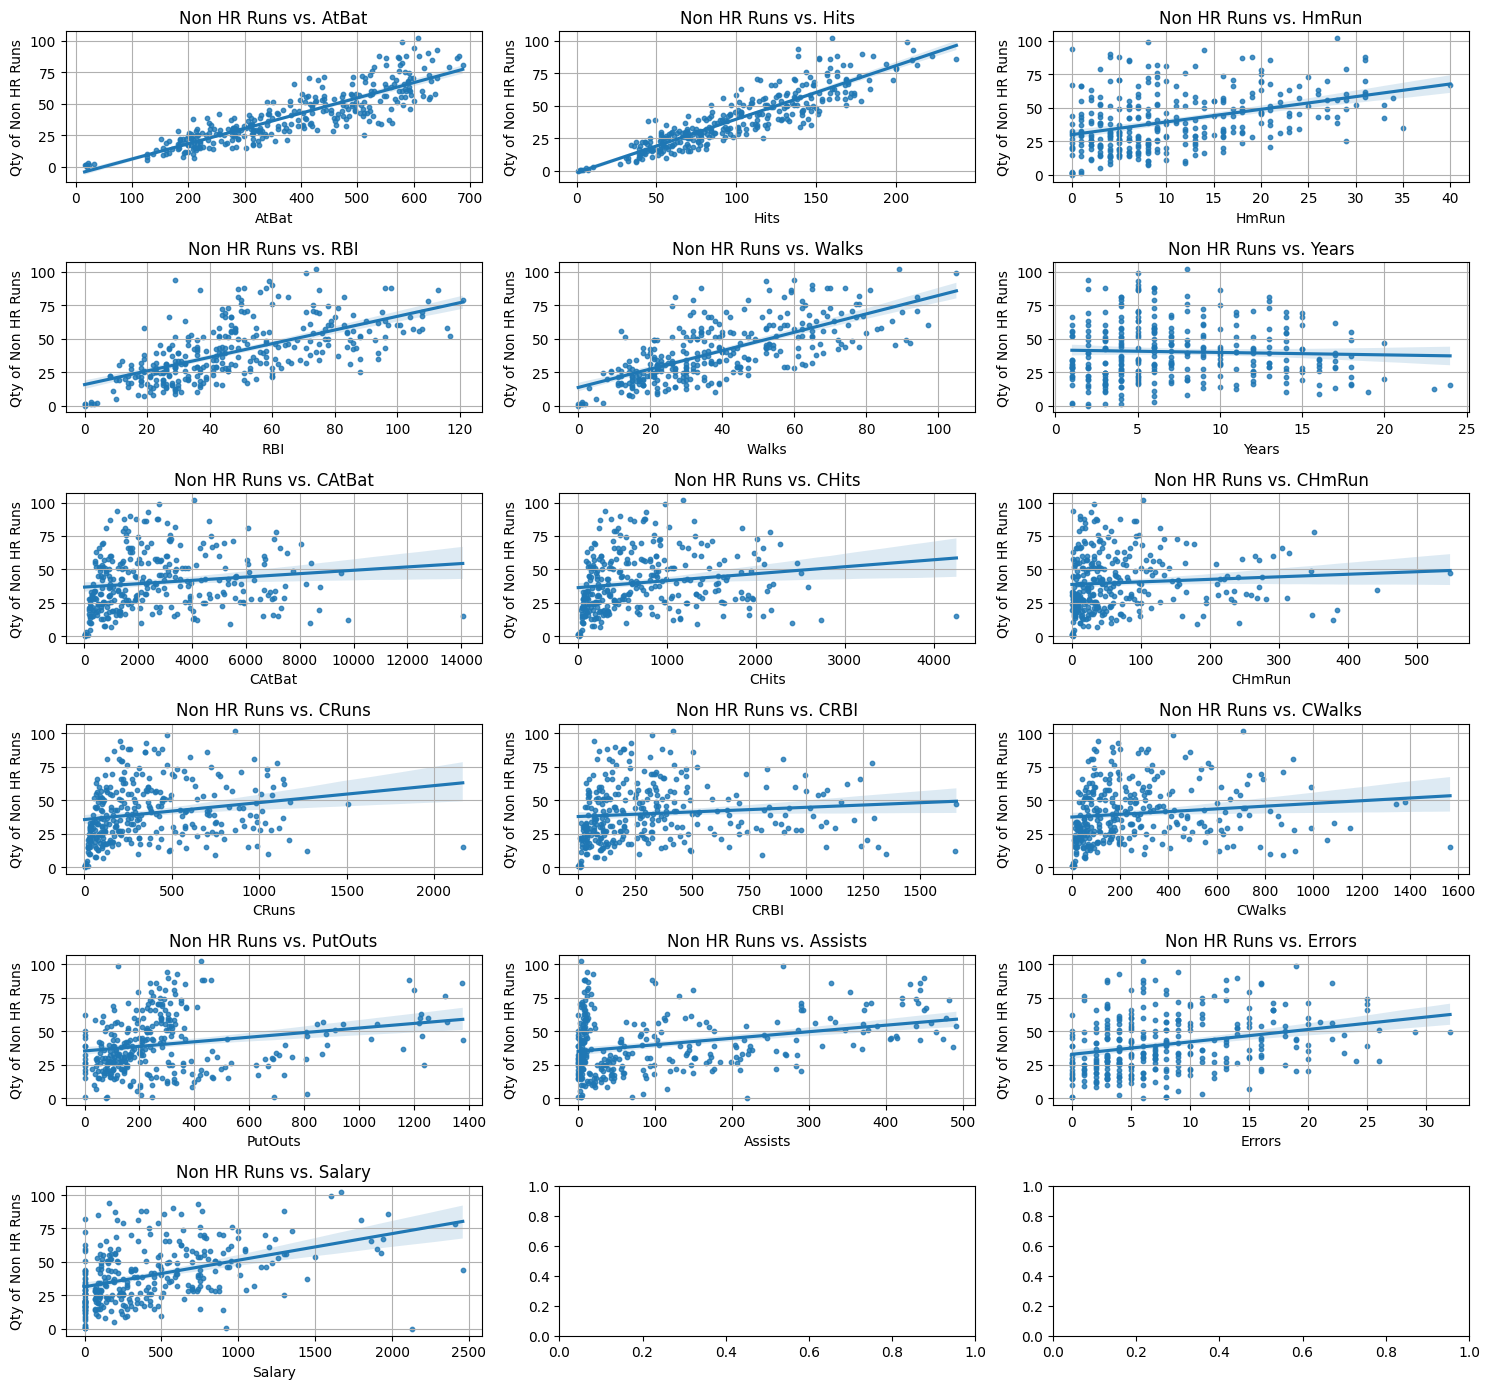

In [21]:
# Visualize a regression fit for all the variables to validate if there are better predictors than HR
fig, axes = plt.subplots(6, 3, figsize=(15, 14))
axes = axes.flatten()
# Filter out Runs, because it is just a proxy for nonHRRuns, filter out text data
predictors = [x for x in df_hit.columns if x not in ['nonHRRuns', 'Runs', 'League', 'Division', 'NewLeague']]
for i, col in enumerate(predictors):
    # Create a scatter plot with a regression line
    sns.regplot(x=col, y='nonHRRuns', data=df_hit, ax=axes[i], scatter_kws={'s': 10}) #scatter_kws to make points smaller.
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Qty of Non HR Runs")
    axes[i].set_title(f"Non HR Runs vs. {col}")
    axes[i].grid(True)
plt.tight_layout()
plt.show()

<b>Answer:</b><p>
At Bats and Hits actually seem like a better predictor based on the data. So let's compare all three.

In [22]:
# Run a Ordinary Least Squares model and fit
predictors = ['AtBat', 'Hits', 'HmRun']
X = sm.add_constant(df_hit[predictors])
y = df_hit['nonHRRuns']
model = sm.OLS(y, X)
result = model.fit(maxiter=1000)
print(result.summary())
print(result.pvalues)

                            OLS Regression Results                            
Dep. Variable:              nonHRRuns   R-squared:                       0.820
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     482.5
Date:                Wed, 12 Mar 2025   Prob (F-statistic):          5.50e-118
Time:                        18:59:30   Log-Likelihood:                -1166.8
No. Observations:                 322   AIC:                             2342.
Df Residuals:                     318   BIC:                             2357.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -3.1805      1.450     -2.193      0.0

<b>Answer:</b><p>
All three variables are statistically significant, so we can keep them.<p>
What we do find, as I expected, is that the more home runs you hit, the fewer non HomeRun Runs you score. It seems paradoxical that the number is more correlated negatively, than the positive correlation between Hits and Non HomeRun Runs. There is likely some other factor at play, like the fitness of the players, possibly their speed (or lack of) running the bases.

In [23]:
# Do we need another visualization?

(d) Comment the questions (and answers) in this analysis.  Were you able to answer all of these questions?  Are all questions well defined?  Is the data good enough to answer all these?

I believe I was able to answer all of my questions. My question was possibly not as well defined as it could be, but once I visualized all of the variables together, I was able to augment with a good result.

### Problem 3

Points: 20

In this problem, we will use the 'sales' dataset. 

The dataset describes over 900 territories' car sales and cost:
- territory_id: ID of the territory
- product: car brand
- sales: the unique territory's car sales voume
- cost: the unique territory's car costs, inccluding shipping, marketing and customer support. 

In our analysis, we will be interested in the relationship between `sales` and `costs`.

(a) Use exploratory techniques to summarize the variables in the datasets (at least 2 visualizations)


In [4]:
sales = pd.read_csv('sales.csv')
print(sales.shape)
sales.head()

(934, 4)


,territory_id,product,sales,cost
0,1,Tesla,732,670
1,2,Bentley,692,670
2,3,Bentley,690,670
3,4,Bentley,690,670
4,5,Tesla,735,665


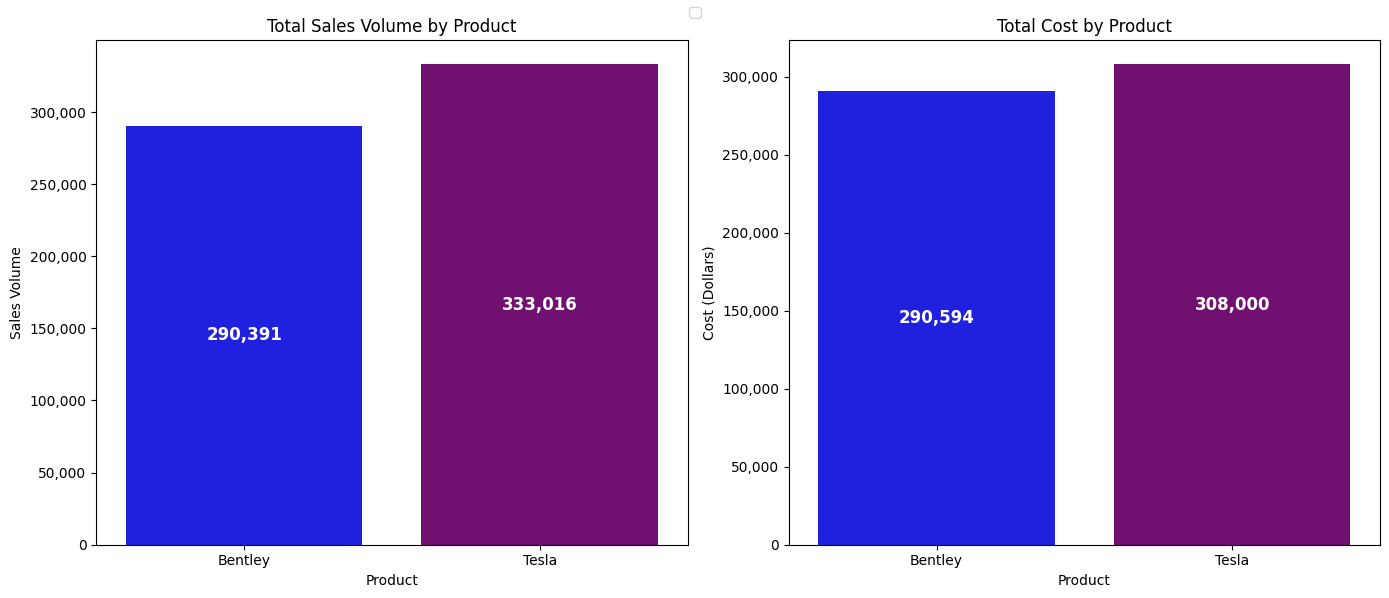

In [25]:
# Basic Sales and Cost by product
# Create subplots side by side
df_car_brand_totals = sales.groupby('product')[['sales', 'cost']].sum().reset_index()
fig, axes = plt.subplots(1, 2, figsize=(14, 6))  # 1 row, 2 columns

# Sales Chart (Volume)
sales_plot = sns.barplot(x='product', y='sales', data=df_car_brand_totals, ax=axes[0], palette={'Bentley': 'blue', 'Tesla': 'purple'}, hue='product')
axes[0].set_title('Total Sales Volume by Product')
axes[0].set_xlabel('Product')
axes[0].set_ylabel('Sales Volume')

# Add numbers inside each bar
for p in sales_plot.patches:
    sales_plot.annotate(format(p.get_height(), ',.0f'),
                        (p.get_x() + p.get_width() / 2., p.get_height() / 2.),
                        ha='center', va='center',
                        color='white', fontsize=12, fontweight='bold')

# Format y-axis with commas
axes[0].yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, p: "{:,}".format(int(x))))

# Cost Chart (Dollars)
cost_plot = sns.barplot(x='product', y='cost', data=df_car_brand_totals, ax=axes[1], palette={'Bentley': 'blue', 'Tesla': 'purple'}, hue='product')
axes[1].set_title('Total Cost by Product')
axes[1].set_xlabel('Product')
axes[1].set_ylabel('Cost (Dollars)')

# Add numbers inside each bar
for p in cost_plot.patches:
    cost_plot.annotate(format(p.get_height(), ',.0f'),
                       (p.get_x() + p.get_width() / 2., p.get_height() / 2.),
                       ha='center', va='center',
                       color='white', fontsize=12, fontweight='bold')

# Format y-axis with commas
axes[1].yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, p: "{:,}".format(int(x))))

# Add legend
handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center', ncol=2)

plt.tight_layout()  # Adjust subplot parameters to give specified padding.
plt.show()

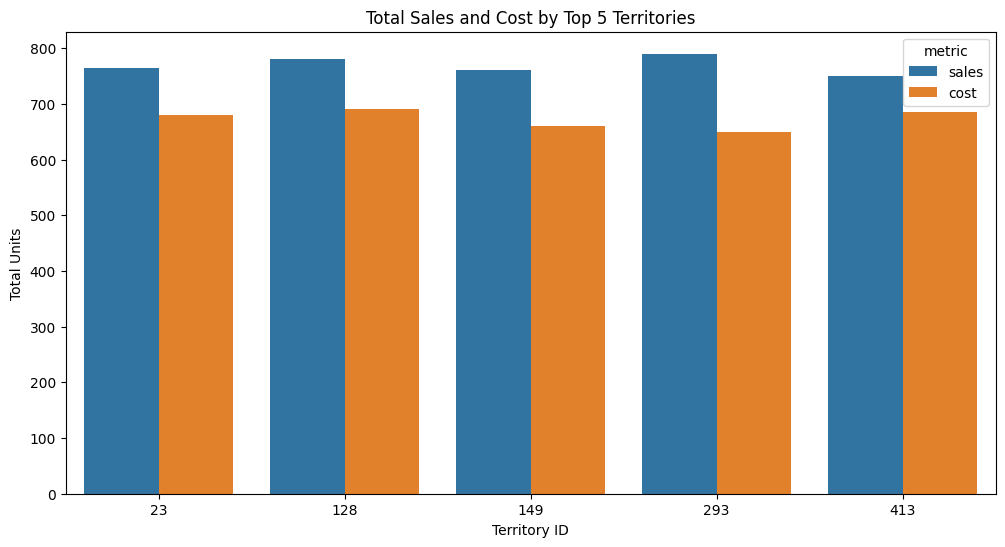

In [26]:
# Top 5 Territories
territory_totals = sales.groupby('territory_id').agg({'sales': 'sum', 'cost': 'sum'}).reset_index()
top_5_territories = territory_totals.sort_values(by='sales', ascending=False).head(5)

# Melt the DataFrame to have sales and cost in one column for plotting
df_melted = top_5_territories.melt(id_vars='territory_id', var_name='metric', value_name='total')

# Create the bar chart using seaborn
plt.figure(figsize=(12, 6))
sns.barplot(x='territory_id', y='total', hue='metric', data=df_melted)
plt.title('Total Sales and Cost by Top 5 Territories')
plt.xlabel('Territory ID')
plt.ylabel('Total Units')
plt.show()

(b) Calculate the Pearson correlation score bewteen 'sales' and 'cost' based on the score formula step by step. 

##### Please do NOT use any built-in packages or libraries to populate the correlation score; instead, use the formulas stated below to solve the problem

The Pearson correlation coefficient, $r$, between two variables $X1$ and $X2$ is defined as:

$$ r = \frac{\sum_{i=1}^n (X1_i - \overline{X1})(X2_i - \overline{X2})}{\sqrt{\sum_{i=1}^n (X1_i - \overline{X1})^2} \sqrt{\sum_{i=1}^n (X2_i - \overline{X2})^2}} $$

Where:
- $X1_i$ and $X2_i$ are the values of the $i^{th}$ data point of variables $X1$ and $X2$, respectively.
- $\overline{X}$ and $\overline{X2}$ are the means of $X1$ and $X2$.


In [4]:
# Calculate the Pearson correlation coefficient between two lists.
x1 = sales['sales']
x2 = sales['cost']
# Check to make sure they are same length
if len(x1) != len(x2):
    print("Input lists must have the same length.")
    exit()

# Get the length to calculate the mean
n = len(x1)
# Get the means 
mean_x1 = sum(x1) / n
mean_x2 = sum(x2) / n

numerator = sum((x1[i] - mean_x1) * (x2[i] - mean_x2) for i in range(n))
denominator_x1 = sum((x1[i] - mean_x1) ** 2 for i in range(n))
denominator_x2 = sum((x2[i] - mean_x2) ** 2 for i in range(n))

if denominator_x1 == 0 or denominator_x2 == 0:
    pears = 0.0  # Handle division by zero

pears = numerator / (denominator_x1 ** 0.5 * denominator_x2 ** 0.5)
print(f"Pearson Correlation: {pears}")

Pearson Correlation: 0.2013219486221009


In [5]:
# Double check results
from scipy.stats import pearsonr
corr, _ = pearsonr(x1, x2)

print(f"Pearson correlation coefficient: {corr}")

Pearson correlation coefficient: 0.2013219486221005


(c) Train a simple linear regression model on response variable -'sales' and predictor variable -'costs'.  Calculate the coefficients (slope and intercept).

##### Please do NOT use any packages or libraries to get the coefficient values; instead, use the formulas stated below to proceed.

In a simple linear regression model where $y$ (sales) is the response variable and $x$ (cost) is the predictor variable, the slope ($\beta_1$) and intercept ($\beta_0$) are given by:

##### Slope ($\beta_1$):
$$ \beta_1 = \frac{\sum_{i=1}^n (x_i - \overline{x})(y_i - \overline{y})}{\sum_{i=1}^n (x_i - \overline{x})^2} $$

##### Intercept ($\beta_0$):
$$ \beta_0 = \overline{y} - \beta_1 \overline{x} $$

Where:
- $x_i$ and $y_i$ are the values of the $i^{th}$ data point for the variables $x$ and $y$, respectively.
- $\overline{x}$ and $\overline{y}$ are the means of $x$ and $y$.


In [28]:
# Manual calculation of Slope and Intercept
x = sales['sales']
y = sales['cost']
n = len(x)
# Get the means 
mean_x = sum(x) / n
mean_y = sum(y) / n
numerator = sum((x[i] - mean_x) * (y[i] - mean_y) for i in range(n))
denominator = sum((x[i] - mean_x) ** 2 for i in range(n))

if denominator == 0:
    slope = 0.0  # Handle division by zero
else:
    slope = numerator / denominator

intercept = mean_y - (slope * mean_x)
print(f'Slope: {slope:.8f}', f'Intercept: {intercept:.4f}')

Slope: 0.12885535 Intercept: 554.8872


(d) Write down the simple linear regression model equation based on (c) results. Provide reflections on the model equation.

<b>Answer:</b><p>
The Simple Linear Regression Model Equation is:<p>
$$ \hat{y} = \hat{\beta_0} + \hat{\beta_1}{x}$$ <p>
<b>Not sure what the question is asking? Is this correct?</b><p>
To get the simple linear regression, you take the intercept $$ \hat{\beta_0} $$
    Add it to the slope for $$ + \hat{\beta_1} $$
    And then multiply times the x value you have $$ * {x} $$

In [29]:
# DOES NOT WORK
x = 692.00
print(f"If x = {x}")
simple_linear_regression = (intercept * x) + slope 
print(f"Simple Linear Regression estimate of Cost is : {simple_linear_regression}")

If x = 692.0
Simple Linear Regression estimate of Cost is : 383982.0907747595


### Problem 4

Points: 20

The Wisconsin Breast Cancer dataset is available as a comma-delimited text file on the UCI Machine Learning Repository {https://archive.ics.uci.edu/dataset/15/breast+cancer+wisconsin+original}. Our goal in this problem will be to predict whether observations (i.e. tumors) are malignant or benign. We will use the original dataset in this problem. 

(a) Obtain the data, and load it into your programming environment by pulling it directly from the web. (Do **not** download it and import it from any CSV file.) Give a brief description of the data. 

The Wisconsin Breast Cancer dataset contains 699 samples and a total of 11 variables. Some data samples have missing data. 

In [30]:
import os
# Web location of data file
loc = "http://archive.ics.uci.edu/ml/machine-learning-databases/"
ds = "breast-cancer-wisconsin/breast-cancer-wisconsin.data"
url = loc + ds

# Load data
try:
    breast_data = pd.read_csv(url, sep=",", header=None, na_values="?")
except Exception as e:
    print(e)
    breast_data = pd.read_csv('breast_cancer.csv', index=False)
if breast_data is not None and not os.path.exists('breast_cancer.csv'):
    breast_data.to_csv('breast_cancer.csv')
breast_data.head

<bound method NDFrame.head of           0   1   2   3   4   5     6   7   8   9   10
0    1000025   5   1   1   1   2   1.0   3   1   1   2
1    1002945   5   4   4   5   7  10.0   3   2   1   2
2    1015425   3   1   1   1   2   2.0   3   1   1   2
3    1016277   6   8   8   1   3   4.0   3   7   1   2
4    1017023   4   1   1   3   2   1.0   3   1   1   2
..       ...  ..  ..  ..  ..  ..   ...  ..  ..  ..  ..
694   776715   3   1   1   1   3   2.0   1   1   1   2
695   841769   2   1   1   1   2   1.0   1   1   1   2
696   888820   5  10  10   3   7   3.0   8  10   2   4
697   897471   4   8   6   4   3   4.0  10   6   1   4
698   897471   4   8   8   5   4   5.0  10   4   1   4

[699 rows x 11 columns]>

In [31]:
# Look at unique values in columns
df_breast = breast_data.copy()
columns = df_breast.columns
unique_values = {col: df_breast[col].unique() for col in columns}
for col, values in unique_values.items():
    print(f"Unique values for {col}: {values[:9]}")

Unique values for 0: [1000025 1002945 1015425 1016277 1017023 1017122 1018099 1018561 1033078]
Unique values for 1: [ 5  3  6  4  8  1  2  7 10]
Unique values for 2: [ 1  4  8 10  2  3  7  5  6]
Unique values for 3: [ 1  4  8 10  2  3  5  6  7]
Unique values for 4: [ 1  5  3  8 10  4  6  2  9]
Unique values for 5: [ 2  7  3  1  6  4  5  8 10]
Unique values for 6: [ 1. 10.  2.  4.  3.  9.  7. nan  5.]
Unique values for 7: [3 9 1 2 4 5 7 8 6]
Unique values for 8: [ 1  2  7  4  5  3 10  6  9]
Unique values for 9: [ 1  5  4  2  3  7 10  8  6]
Unique values for 10: [2 4]


(b) Tidy the data, ensuring that each variable is properly named and cast as the correct data type. Discuss any missing data.

In [32]:
display(df_breast.isna().sum())
print(df_breast.dtypes)
df_breast.describe()

0      0
1      0
2      0
3      0
4      0
5      0
6     16
7      0
8      0
9      0
10     0
dtype: int64

0       int64
1       int64
2       int64
3       int64
4       int64
5       int64
6     float64
7       int64
8       int64
9       int64
10      int64
dtype: object


,0,1,2,3,4,5,6,7,8,9,10
count,6.990000e+02,699.000000,699.000000,699.000000,699.000000,699.000000,683.000000,699.000000,699.000000,699.000000,699.000000
mean,1.071704e+06,4.417740,3.134478,3.207439,2.806867,3.216023,3.544656,3.437768,2.866953,1.589413,2.689557
std,6.170957e+05,2.815741,3.051459,2.971913,2.855379,2.214300,3.643857,2.438364,3.053634,1.715078,0.951273
min,6.163400e+04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,8.706885e+05,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,2.000000
50%,1.171710e+06,4.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000,2.000000
75%,1.238298e+06,6.000000,5.000000,5.000000,4.000000,4.000000,6.000000,5.000000,4.000000,1.000000,4.000000
max,1.345435e+07,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


The data from this data set is all numbers.<p>
0. Sample code number:            id number
1. Clump Thickness:               1 - 10
2. Uniformity of Cell Size:       1 - 10
3. Uniformity of Cell Shape:      1 - 10
4. Marginal Adhesion:             1 - 10
5. Single Epithelial Cell Size:   1 - 10
6. Bare Nuclei:                   1 - 10
7. Bland Chromatin:               1 - 10
8. Normal Nucleoli:               1 - 10
9. Mitoses:                       1 - 10
10. Class:                        (2 for benign, 4 for malignant)<p>
There are a small number of NaNs in Column 6.

In [33]:
# Rename the columns
col_map_txt = """0. Sample code number:            id number
1. Clump Thickness:               1 - 10
2. Uniformity of Cell Size:       1 - 10
3. Uniformity of Cell Shape:      1 - 10
4. Marginal Adhesion:             1 - 10
5. Single Epithelial Cell Size:   1 - 10
6. Bare Nuclei:                   1 - 10
7. Bland Chromatin:               1 - 10
8. Normal Nucleoli:               1 - 10
9. Mitoses:                       1 - 10
10. Class:                        (2 for benign, 4 for malignant)"""
col_map = {}
for row in col_map_txt.split('\n'):
    col_num = int(row.split('.')[0])
    col_name = row.split('.')[1].split(':')[0].strip().lower().replace(' ', '_')
    col_map[col_num] = col_name
print(col_map)
df_breast.rename(columns=col_map, inplace=True)
df_breast.fillna(-1, inplace=True)
df_breast = df_breast.astype(int)
display(df_breast)

{0: 'sample_code_number', 1: 'clump_thickness', 2: 'uniformity_of_cell_size', 3: 'uniformity_of_cell_shape', 4: 'marginal_adhesion', 5: 'single_epithelial_cell_size', 6: 'bare_nuclei', 7: 'bland_chromatin', 8: 'normal_nucleoli', 9: 'mitoses', 10: 'class'}


,sample_code_number,clump_thickness,uniformity_of_cell_size,uniformity_of_cell_shape,marginal_adhesion,single_epithelial_cell_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitoses,class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...
694,776715,3,1,1,1,3,2,1,1,1,2
695,841769,2,1,1,1,2,1,1,1,1,2
696,888820,5,10,10,3,7,3,8,10,2,4
697,897471,4,8,6,4,3,4,10,6,1,4


(c) Split the data into a training and validation set such that a random 70\% of the observations are in the training set.

In [34]:
# Split the data into training and validation sets
df_train, df_val = train_test_split(df_breast, test_size=0.3, random_state=7)
display(df_train)

,sample_code_number,clump_thickness,uniformity_of_cell_size,uniformity_of_cell_shape,marginal_adhesion,single_epithelial_cell_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitoses,class
23,1057013,8,4,5,1,2,-1,7,3,1,4
688,603148,4,1,1,1,2,1,1,1,1,2
452,1227081,3,1,1,3,2,1,1,1,1,2
232,1231706,8,4,6,3,3,1,4,3,1,2
154,1190485,1,1,1,1,2,1,1,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...
579,824249,1,1,1,1,2,1,3,1,1,2
502,1253917,4,1,1,2,2,1,2,1,1,2
537,1116192,5,1,2,1,2,1,3,1,1,2
196,1213375,8,4,4,5,4,7,7,8,2,2


(d) Fit a machine learning model to predict whether tissue samples are malignant or benign. Compute and discuss the resulting confusion matrix. Be sure to address which of the errors that are identified you consider most problematic in this context.

In [35]:
# Convert the malignant/benign column into 0 (benign) or 1 (malignant)
df_breast['is_malignant'] = df_breast['class'].map({2: 0, 4: 1})
df_breast

,sample_code_number,clump_thickness,uniformity_of_cell_size,uniformity_of_cell_shape,marginal_adhesion,single_epithelial_cell_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitoses,class,is_malignant
0,1000025,5,1,1,1,2,1,3,1,1,2,0
1,1002945,5,4,4,5,7,10,3,2,1,2,0
2,1015425,3,1,1,1,2,2,3,1,1,2,0
3,1016277,6,8,8,1,3,4,3,7,1,2,0
4,1017023,4,1,1,3,2,1,3,1,1,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...
694,776715,3,1,1,1,3,2,1,1,1,2,0
695,841769,2,1,1,1,2,1,1,1,1,2,0
696,888820,5,10,10,3,7,3,8,10,2,4,1
697,897471,4,8,6,4,3,4,10,6,1,4,1


Logistic Regression Accuracy: 0.9952380952380953
K-Nearest Neighbors Accuracy: 0.9523809523809523
Support Vector Machine Accuracy: 0.9571428571428572
Decision Tree Accuracy: 1.0
Random Forest Accuracy: 1.0
Gradient Boosting Accuracy: 1.0
Naive Bayes Accuracy: 1.0


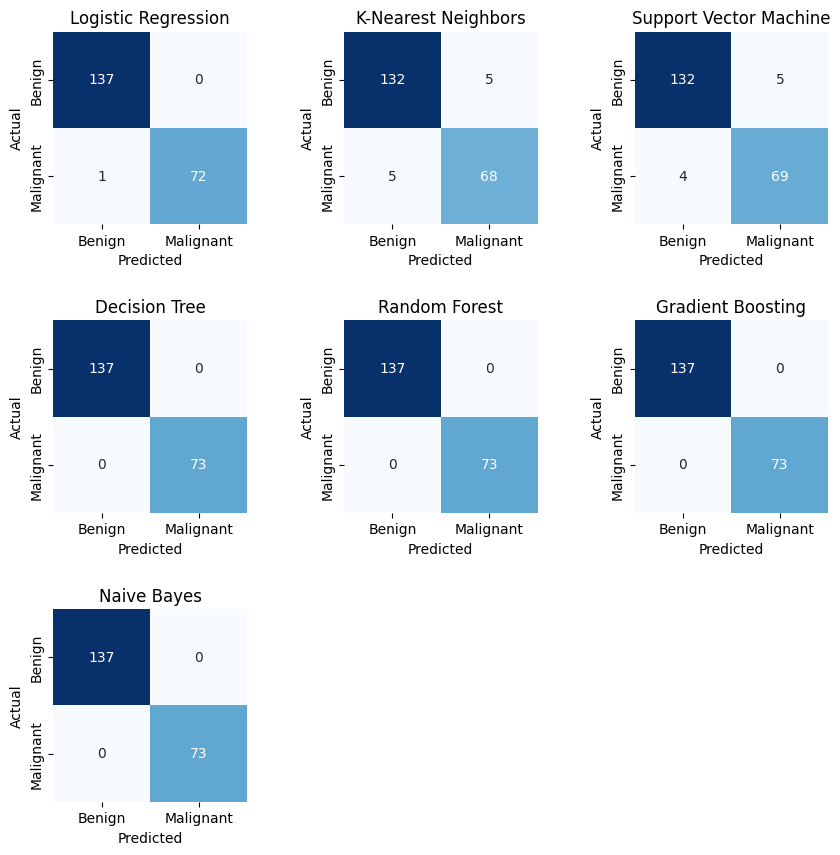

Highest: Decision Tree 1.0


In [36]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report
# Not using all these
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Support Vector Machine': SVC(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'Naive Bayes': GaussianNB()
}

# Train and evaluate each model
conf_matrices = {}
high_model, high_acc  = '', -9999
X = df_breast.drop(['sample_code_number', 'class'], axis=1)
y = df_breast['is_malignant']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=7)
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    if accuracy > high_acc:
        high_model, high_acc = name, accuracy
    print(f'{name} Accuracy: {accuracy}')
    conf_matrix = confusion_matrix(y_test, y_pred)
    conf_matrices[name] = confusion_matrix(y_test, y_pred)
    
# Plot confusion matrices in a 3x3 grid
fig, axes = plt.subplots(3, 3, figsize=(10, 10))
axes = axes.flatten()

for ax, (name, conf_matrix) in zip(axes, conf_matrices.items()):
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Benign', 'Malignant'], yticklabels=['Benign', 'Malignant'], ax=ax, cbar=False)
    ax.set_title(name)
    ax.set_xlabel('Predicted')
    ax.set_ylabel('Actual')

# Hide any unused subplots
for i in range(len(conf_matrices), len(axes)):
    fig.delaxes(axes[i])
plt.subplots_adjust(wspace=0.5, hspace=0.5)
plt.show()
print("Highest:", high_model, high_acc)

All of these models work pretty well; the accuracy changed slightly with a different random seed.<p>
A false positive is obviously emotionally difficult, however, hopefully not life threatening. That happened most often with K-Nearest and Support Vector.<p>
A false negative, could easily be life threatening, because the patient would think they have a benign tumor, but it is really malignant, and it could metasticize before they could get treatment. This happened most often with K-Nearest anmd Support Vector.<p>
Decision Tree, Random Forest, Gradient and Naive Bayes all seemed to work better even with different random seeds and I would use these models to predict.

### Problem 5

Points: 10

Please answer the questions below by writing a short response. 

(a) Please describe 3 **classification** machine learning methods and each model's real world application.

1. <b>Logistic Regression</b>. Can be used as a classification predictor as well as quantitative. It models the relationship between independent variables and the log-odds of the dependent variable to predict the probability of a binary outcome. It can be used to predict if a tumor is malignant or benign. It can be used to predict if a financial transaction is fraudulent or not.
2. <b>K Nearest Neighbors (KNN)</b>. Is a classification method that attempts to estimate the conditional distribution of a given X. It calculates the distances away from all elements and determines which group is most prevalent. KNN is used to create "people who bought this also bought" recommendations. By finding customers with similar purchase histories, the algorithm can suggest products that a user might like.
3. <b>Naive Bayes</b>. Naive Bayes is a simplified version of “Full Bayes”. It assumes that all features are conditionally independent (most of the time a faulty assumption, however the model performs well despite). It is “naive” because it does not account for order of features. Real world applications are: Spam Detection & Filtering, Email classification. Sentiment Analysis, Customer feedback analysis. Medical Diagnosis, predicting diseases or conditions based on symptoms. Fraud Detection, identify fraudulent transactions. Text Classification, automatically categorize emails or other digital content.

Accuracy: 1.0

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         1

    accuracy                           1.00         2
   macro avg       1.00      1.00      1.00         2
weighted avg       1.00      1.00      1.00         2


Confusion Matrix:
[[1 0]
 [0 1]]


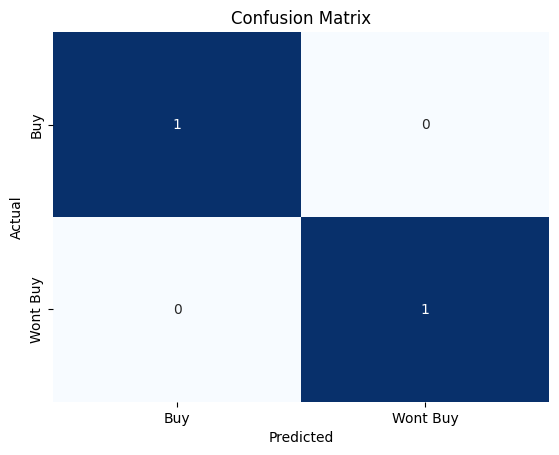


Prediction for new data [[   33 65000]]: [1]


In [37]:
# Here is a simple example of Naive Bayes given their age and income 
# The model will determine if they will purchase a product

# Sample Data (replace with your own dataset)
# Example: Predicting if a person will buy a product based on age and income.
X = np.array([[25, 50000], [30, 60000], [35, 70000], [20, 40000], [40, 80000],
              [22, 45000], [38, 75000], [28, 55000], [45, 90000], [19, 38000]])
y = np.array([0, 0, 1, 0, 1, 0, 1, 0, 1, 0])  # 0: No buy, 1: Buy

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the Naive Bayes model (Gaussian Naive Bayes for continuous features)
model = GaussianNB()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
print(cm)

# Optionally visualize the confusion matrix with seaborn
# sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Buy', 'Wont Buy'], yticklabels=['Buy', 'Wont Buy'], ax=ax, cbar=False)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=['Buy', 'Wont Buy'], yticklabels=['Buy', 'Wont Buy'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Example Prediction of a new data point.
new_data = np.array([[33, 65000]])
new_prediction = model.predict(new_data)
print(f"\nPrediction for new data {new_data}: {new_prediction}")

b) This quarter, we discussed four 'Missing data' types: 1) Not missing at random (NMAR), 2) Missing completely at random(MCAR), 3) Missing at random(MAR)and 4) Missing by design (MD).  Select **2 missing data types** listed above. Describe those two missing data types meanings and provide 1 real world example for each missing data type.

<b>Answer:</b><p>
<b>Missing Completely At Random (MCAR)</b><p>
Definition: The probability of a data point being missing is entirely unrelated to any observed or unobserved variables in the dataset, ie it is not related. The missing data is due to an error, completely independent of the data itself.<p>
Examples:<p>
Survey Data Loss: In a survey, some questionnaires are randomly lost in the mail or accidentally deleted from a database. The loss is purely random.<p>
Technical Defects: A sensor randomly malfunctions and fails to record data points at certain intervals. .<p>
Randomized Experiments: In a clinical trial, some participants might miss appointments due to unrelated events (e.g., car trouble, sudden illness), leading to missing data that is not related to their health or treatment.<p>
<p>
<b>Missing At Random (MAR)</b><p>
Definition: The probability of a data point being missing is related to observed variables in the dataset, but not to the unobserved value itself.<p>
Example:<p>
Medical Records: Older patients might have more missing data in certain medical fields compared to younger patients due to having older, paper records. Within each age group, the probability of missing data is independent of the actual missing values.<p>
Income Survey: In an income survey, women might be less likely to report their income than men. Accounting for gender, the missingness is no longer related to the income itself. The missing data is dependent on the observed gender variable.<p>
Customer Satisfaction: Customers who purchased a specific product type might be less likely to respond to a satisfaction survey. However, once we account for the product type, the missing data is no longer related to the unobserved satisfaction level.<p>

(c) What are the advantages and disadvantages of a very flexible (versus a less flexible) approach for regression or classification? Under what circumstances might a more flexible approach be preferred to a less flexible approach? When might a less flexible approach be preferred?

<b>Answer:</b><p>
In general, a more restrictive model (or less flexible) are more interpretable, while more flexible models are less interpretable. See this chart from Diez et al. 2019:<p>
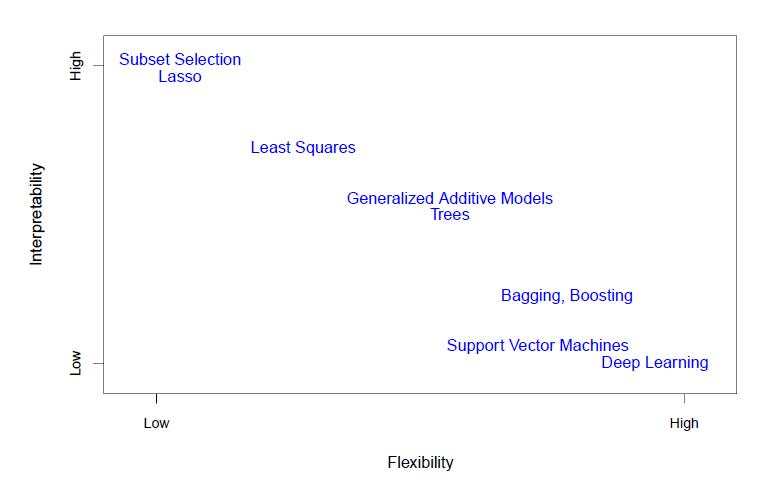

Linear Regression is a fairly inflexible model because it only generates linear function such as lines. On the other hand, a linear model fit by least squares is a much more flexible model with a much more complex outcome. Many "boosted" models fit in this more flexible category.
Source: Diez, D., Cetinkaya-Rundel, M., Barr, C., & OpenIntro. (2019, Fourth Edition). OpenIntro Statistics.

### Problem 6

Points: 10

Suppose we have a dataset with five predictors, $X_1 =$ GPA, $X_2 =$ IQ, $X_3 =$ Race (1 for Female, and 0 for Male), $X_4 =$ Interaction between GPA and IQ, and $X_5 =$ Interaction between GPA and Gender. Note: the data here is limited as gender was collected as a binary variable.

The response is starting salary after graduation (in thousands of dollars). Suppose we use least squares to fit the model and get $\hat{\beta}_0=50, \hat{\beta}_1=20, \hat{\beta}_2=0.07, \hat{\beta}_3=35, \hat{\beta}_4=0.01$, and $\hat{\beta}_5=-10$. 

(a) Which answer is correct and why? <font color = red>[single choice question]

i. For a fixed value of IQ and GPA, males earn more on average than females.

ii. For a fixed value of IQ and GPA, females earn more on average than males.

iii. For a fixed value of IQ and GPA, males earn more on average than females provided that the GPA is high enough.

iv. For a fixed value of IQ and GPA, females earn more on average than males provided that the GPA is high enough.

<b>Answer:</b><p>
Is this the correct formula?<p>
$$ salary = \hat{\beta_0} + (\hat{\beta_1}*GPA) + (\hat{\beta_2}*IQ) + (\hat{\beta_3}*Sex) + (\hat{\beta_4} * GPA * IQ) + (\hat{\beta_5}* GPA * Sex) $$ <p>

In [38]:
# Run some sample data

# Given B values
b0, b1, b2, b3, b4, b5 = 50, 20, .07, 35, .01, -10

# GPA, IQ, Sex (1 female, 0 male)
examples = [[4.0, 120, 1], [4.0, 120, 0], [2.0, 120, 1], [2.0, 120, 0]] 
for gpa, iq, sex in examples:
    salary = b0 + (b1 * gpa) + (b2 * iq) + (b3 * sex) + (b4 * gpa * iq) + (b5 * gpa * sex)
    gender = 'female' if sex == 1 else 'male'
    print(f"GPA: {gpa}, IQ: {iq}, Sex: {gender}. Equals salary={salary}")

GPA: 4.0, IQ: 120, Sex: female. Equals salary=138.20000000000002
GPA: 4.0, IQ: 120, Sex: male. Equals salary=143.20000000000002
GPA: 2.0, IQ: 120, Sex: female. Equals salary=115.80000000000001
GPA: 2.0, IQ: 120, Sex: male. Equals salary=100.80000000000001


<b>Answer:</b><p>
answer `i` and `ii` are definitely not correct because we see the opposite of both of those given differing GPAs.<p>
If we get the difference between `salaryfemale - salarymale` we should be able to find out the "break point" for GPA.<p>
$$ salaryfemale = 50 + (20*GPA) + (.07*IQ) + (35*Sex) + (.01*GPA*IQ) + (-10*GPA*Sex) $$ <p>
$$ salarymale = 50 + (20*GPA) + (.07*IQ) + (35*Sex) + (.01*GPA*IQ) + (-10*GPA*Sex) $$ <p>
$$ salaryfemale - salarymale = (50 + (20*GPA) + (.07*IQ) + (35*1) + (.01*GPA*IQ) + (-10*GPA*1)) - (50 + (20*GPA) + (.07*IQ) + (35*0) + (.01*GPA*IQ) + (-10*GPA*0)) $$<p>
$$ salaryfemale - salarymale = (50 + (20*GPA) + (.07*IQ) + 35 + (.01*GPA*IQ) + (-10*GPA)) - (50 + (20*GPA) + (.07*IQ) + (.01*GPA*IQ)) $$<p>
$$ salaryfemale - salarymale = ((20*GPA) + (.07*IQ) + 35 + (.01*GPA*IQ) + (-10*GPA)) - ((20*GPA) + (.07*IQ) + (.01*GPA*IQ)) $$<p>
$$ salaryfemale - salarymale = (35 + (-10*GPA))) $$<p>
Find when the difference is positive:<p>
$$ 35 - 10*GPA > 0 $$<p>
$$ GPA < 3.5 $$<p>
So when GPA is below 3.5, females earn more. Let's test.

In [39]:
# GPA, IQ, Sex (1 female, 0 male)
examples = [[3.6, 120, 1], [3.6, 120, 0], [3.5, 120, 1], [3.5, 120, 0], [3.4, 120, 1], [3.4, 120, 0]] 
for gpa, iq, sex in examples:
    salary = b0 + (b1 * gpa) + (b2 * iq) + (b3 * sex) + (b4 * gpa * iq) + (b5 * gpa * sex)
    gender = 'female' if sex == 1 else 'male'
    print(f"GPA: {gpa}, IQ: {iq}, Sex: {gender}. Equals salary={salary}")

GPA: 3.6, IQ: 120, Sex: female. Equals salary=133.72
GPA: 3.6, IQ: 120, Sex: male. Equals salary=134.72
GPA: 3.5, IQ: 120, Sex: female. Equals salary=132.6
GPA: 3.5, IQ: 120, Sex: male. Equals salary=132.6
GPA: 3.4, IQ: 120, Sex: female. Equals salary=131.48000000000002
GPA: 3.4, IQ: 120, Sex: male. Equals salary=130.48000000000002


<b>Answer:</b><p>
The correct answer is `iii. For a fixed value of IQ and GPA, males earn more on average than females provided that the GPA is high enough.`

(b) Predict the salary of a female with IQ of 110 and a GPA of 4.0.

In [47]:
# Convert the equation above into Python
gpa, iq, sex = 4, 110, 1
salary = b0 + (b1 * gpa) + (b2 * iq) + (b3 * sex) + (b4 * gpa * iq) + (b5 * gpa * sex)
gender = 'female' if sex == 1 else 'male'
print(f"GPA: {gpa}, IQ: {iq}, Sex: {gender}. Equals salary={salary}")

GPA: 4, IQ: 110, Sex: female. Equals salary=137.1


(c) True or false: Since the coefficient for the GPA/IQ interaction term is very small, there is little evidence of an interaction effect. Justify your answer.

<b>Answer:</b><p>
False. It is not the `coefficient`, but rather the `P-Value`. We'll fit a model and determine the P-Value.

In [41]:
# Run some example data through and determine the p-value
salaries, gpa_iq = [], []
examples = [[4.0, 120, 1], [4.0, 120, 0], [2.0, 120, 1], [2.0, 120, 0], [4, 110, 1], [3.6, 120, 1], [3.6, 120, 0], [3.5, 120, 1], [3.5, 120, 0], [3.4, 120, 1], [3.4, 120, 0]] 
for gpa, iq, sex in examples:
    salary = b0 + (b1 * gpa) + (b2 * iq) + (b3 * sex) + (b4 * gpa * iq) + (b5 * gpa * sex)
    gpa_iq.append(gpa * iq)
    salaries.append(salary)
# Add more totally random values    
np.random.seed(7)
# Generate random samples
gpa = np.random.uniform(2.0, 4.0, 100)  # GPA between 2.0 and 4.0
iq = np.random.randint(90, 150, 100)    # IQ between 90 and 150
sex = np.random.randint(0, 2, 100) 
combined = np.column_stack((gpa, iq, sex))
for gpa, iq, sex in combined:
    salary = b0 + (b1 * gpa) + (b2 * iq) + (b3 * sex) + (b4 * gpa * iq) + (b5 * gpa * sex)
    gpa_iq.append(gpa * iq)
    salaries.append(salary)
    
X = sm.add_constant(gpa_iq)
y = salaries
model = sm.OLS(y, X)
result = model.fit(maxiter=1000)
print(result.summary())
print(result.pvalues)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.665
Model:                            OLS   Adj. R-squared:                  0.662
Method:                 Least Squares   F-statistic:                     216.1
Date:                Wed, 12 Mar 2025   Prob (F-statistic):           1.26e-27
Time:                        18:59:33   Log-Likelihood:                -350.18
No. Observations:                 111   AIC:                             704.4
Df Residuals:                     109   BIC:                             709.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         88.1483      2.593     33.990      0.0

<b>Answer:</b><p>
The P-Value is less than `.05` so we reject the Null Hypothosis and can state that `(GPA * IQ)` relative to predicted `salary` could not be random chance.

### Problem 7 - Extra Credit

Points: Max. 5

Suppose that $X_1, \ldots X_n$ form a random sample from a Poisson distribution for which the mean $\theta$ is unknown, ($\theta>0)$.<p>
Is this MLE?<p>
MLE stands for Maximum Likelihood Estimation.<p>
It means you need to find the value of the parameter θ (theta) that maximizes the likelihood of observing the data you have.<p>
Likelihood Function: You start with a probability distribution that you believe describes your data. This distribution will have one or more parameters (like θ in your problem). The likelihood function is the product of the probabilities of observing each individual data point, given a specific value for the parameter(s).<p>
Maximization: The goal of MLE is to find the value of the parameter(s) that maximizes this likelihood function. In other words, you're finding the parameter value(s) that make the observed data most probable.

(a) Determine the MLE of $\theta$, assuming that at least one of the observed values is different from 0. Show your work.

<b>Answer:</b><p>
Since $\hat\theta = r/n$<p>
From our course materials:
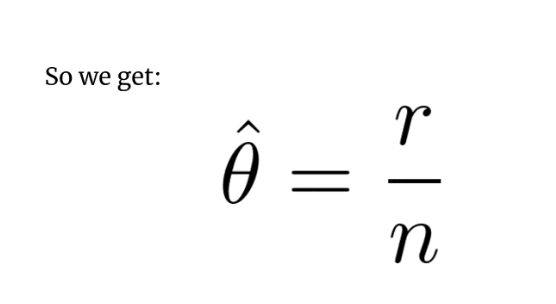
    
where `r` is the observed number of times of "success" (ie the expected outcome) happens and `n` is the total number of times, it ends up being the observed mean.<p>
Using a coin toss as an example, if we want to find out the liklihood of the coin toss being heads and we toss the coin 100 times and we see heads come up 47 times, the MLE of $\hat\theta$ would be `.47` or `47%`.<p>
If you were to code the heads as `1`, and the tails as a `0`, and then take the average of all 100 coin tosses, you would also get `0.47`.

(b) Show that the MLE of $\theta$ does not exists if every observed value is 0.

<b>Answer:</b><p>
If every observed value is 0, the denominator of the function is 0 and therefore the result of MLE $\theta$ is 0.

### Problem 8 - Extra Credit 

Points: Max. 5 

7 Democratic party members and 7 Republican party members are running for 5 seats (1 president, 1 vice president and 3 advisors) in a committee. Voters choose 5 people at random uniformly. 

What is the probability of this event, in which Frank (Democratic) becomes the president and Will( Republican) becomes the vice-president ?

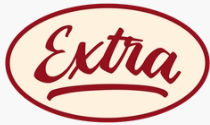

In [42]:
from IPython.display import Image
Image("Extra.png")

(a) Write down your solution logics. (We want to see your reasonings: what makes the sample space (or denominator) and what makes the numerator? Why you think so?

<b>Answer:</b><p>
<b>It is unclear from the scenario if the votes are positional or not. Ie if a person votes for candidates `[9,  1,  6,  4, 12]` does that mean that candidate 9 is being voted for President? Or just that if candidate #9 gets the most votes, they can choose President?</b><p>
`President` and `Vice President` also do not make sense, ie in USA politics:
In each committee, a member of the majority party serves as its `chairperson`, while a member of the minority party serves as its `ranking member`. Four Senate committees instead refer to the ranking minority member as `vice chairperson`.<p>
At any rate, it is obviously a very small number, let's try some tests.

In [43]:
# Simulation of random votes with Position 1 and 2 required
# Ie Frank must get the most votes and Will must get the second most votes
# Simulate voters
observed = 0
for i in range(1, 10000):
    np.random.seed(i)
    votes = [np.random.choice(range(1, 18), 5, replace=False) for _ in range(100)]
    # Pick a random number for Frank and Will
    # frank_dem, will_gop = np.random.choice(range(1, 15), 2)
    frank_dem, will_gop = 8, 5
    voting = {'frank_dem': 0, 'will_gop': 0}
    # Iterate over the votes
    for vote in votes:
        # If we see frank or will, increment their count
        if frank_dem in vote:
            voting['frank_dem'] += 1
        elif will_gop in vote:
            voting['will_gop'] += 1
        # Go through all the votes to tabulate the other candidates
        for v in vote:
            # Do not count Frank and Will again
            if v not in [frank_dem, will_gop]:
                v_str = str(v)
                if v_str not in voting:
                    voting[v_str] = 0
                voting[v_str] += 1
    # Sort the list to figure out the top two candidates
    sorted_list = list(dict(sorted(voting.items(), key=lambda item: item[1], reverse=True)))
    if sorted_list[0] == 'frank_dem' and sorted_list[1] == 'will_gop':
        print('Frank pres, Will vp, OBSERVED!')
        observed += 1
print(f"Ran through {i} iterations and observed {observed} favorable outcomes")

Ran through 9999 iterations and observed 0 favorable outcomes


In [44]:
# Simulation of random votes with any Position 1-5 for Frank & Will
# Simulate voters
observed = 0
for i in range(1, 10000):
    np.random.seed(i)
    votes = [np.random.choice(range(1, 18), 5, replace=False) for _ in range(100)]
    # Pick a random number for Frank and Will
    frank_dem, will_gop = np.random.choice(range(1, 15), 2)
    voting = {'frank_dem': 0, 'will_gop': 0}
    # Iterate over the votes
    for vote in votes:
        # If we see frank or will, increment their count
        if frank_dem in vote:
            voting['frank_dem'] += 1
        elif will_gop in vote:
            voting['will_gop'] += 1
        # Go through all the votes to tabulate the other candidates
        for v in vote:
            # Do not count Frank and Will again
            if v not in [frank_dem, will_gop]:
                v_str = str(v)
                if v_str not in voting:
                    voting[v_str] = 0
                voting[v_str] += 1
    # Sort the list to figure out the top two candidates
    sorted_list = list(dict(sorted(voting.items(), key=lambda item: item[1], reverse=True)))
    if 'frank_dem' in sorted_list[:5] and 'will_gop' in sorted_list[:5]:
        observed += 1
print(f"Ran through {i} iterations and observed {observed} favorable outcomes")

Ran through 9999 iterations and observed 19 favorable outcomes


(b) Write down your calculations for the probability. [Hint: Think about whether the 2 roles (president and VP) assignment is ordered or not. Do not trust LLMs such as ChatGPT's answer completely ]

<b>Answer:</b><p>
If you fix Frank as President and Will as VP, the number of ways to chose 3 people out of 12 (subtract out the 2 for Frank and Will) is:<p>
$\binom{12}{3} = \frac{12!}{3!(12-3)!} = 220$<p>
The total number of ways to chose 5 people out of 14 is:<p>
$\binom{14}{5} = \frac{14!}{5!(14-5)!} = 2002$<p>
Then you divide those probabilities to get the chances that both Frank and Will are chosen:<p>
$\text{Probability} = \frac{\text{Number of favorable outcomes}}{\text{Total number of outcomes}} = \frac{220}{2002} \approx 0.1099$

<b>Answer:</b><p>
The wording is very confusing on this problem; it seems like we are supposed to answer it multiple ways. If I read this part of the question:<p>
`Voters choose 5 people at random uniformly.`<p>
This would indicate that it is not based on the USA Congress, in fact, I am unaware of any government that works like this unless it is a coalition government. So I will answer based on the above instructions first:

In [45]:
# Assuming the roles are not ordered
remain_members = math.factorial(12)/(math.factorial(3) * math.factorial(12-3))
print(f"Remaining members are voted in, posibilities: {remain_members}")
all_members = math.factorial(14)/(math.factorial(5) * math.factorial(14-5))
print(f"All 5 members are voted in, posibilities: {all_members}")
print(f"Assuming some fictional universe, the overall odds of Frank and Will be voted to the top two slots is {remain_members/all_members:.4f}")

Remaining members are voted in, posibilities: 220.0
All 5 members are voted in, posibilities: 2002.0
Assuming some fictional universe, the overall odds of Frank and Will be voted to the top two slots is 0.1099


<b>Answer:</b><p>
Assuming this is the USA government, the two votes are <b>actually independent of each other</b>: all the dems vote for Frank and other dems. Since the English is ambiguous, in this scenario it is still true that `Voters chose 5 people at random`, they just happen to all be in their party. Separately and independently, all the gop vote for Will and the other gop members. I will calculate this way next:

In [46]:
# Assuming the USA government, the two votes are actually independent
print("Frank has a 1 in 7 chance of being voted chairman.")
print("Will has a 1 in 7 chance of being voted vice chairman.")
print("You multiply these odds together to get the possibility that both things happen simultaneously:")
frank_will = (1/7) * (1/7)
print(f"Assuming the the USA congress, the overall odds of Frank and Will being voted to the top two slots is: {frank_will:.4f}")

Frank has a 1 in 7 chance of being voted chairman.
Will has a 1 in 7 chance of being voted vice chairman.
You multiply these odds together to get the possibility that both things happen simultaneously:
Assuming the the USA congress, the overall odds of Frank and Will being voted to the top two slots is: 0.0204


<b>Answer:</b><p>
Based on my Python code in cell `123` above, the lower probability is far more likely, as I never even got one hit. 